# TELECOM CHURN case study

## Importing Required libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import pandas_profiling as pp
#from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

In [2]:
# to view all the columns
pd.set_option('display.max_columns',None)

## Step-1: Import data and Explore

In [3]:
data = pd.read_csv('telecom_churn_data.csv')

In [4]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
data.shape

(99999, 226)

In [6]:
data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [7]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [8]:
# Checking the missing values in the dataset
((data.isnull().sum()/data.shape[0])*100).round(2).sort_values(ascending=False)

arpu_3g_6            74.85
night_pck_user_6     74.85
total_rech_data_6    74.85
arpu_2g_6            74.85
max_rech_data_6      74.85
                     ...  
max_rech_amt_7        0.00
max_rech_amt_6        0.00
total_rech_amt_9      0.00
total_rech_amt_8      0.00
sep_vbc_3g            0.00
Length: 226, dtype: float64

In [9]:
## Checking the unique values in the dataset
data.nunique().sort_values(ascending=True)

std_ic_t2o_mou_6        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_9        1
std_ic_t2o_mou_8        1
                    ...  
arpu_9              79937
arpu_8              83615
arpu_7              85308
arpu_6              85681
mobile_number       99999
Length: 226, dtype: int64

### Removing incoming columns as their total present in total_ic_mou

In [10]:
# all incomig calls columns
ic_contain_cols = data.columns[data.columns.str.contains('ic')]
print(len(ic_contain_cols))
data[ic_contain_cols].head(20)

57


,loc_ic_t2o_mou,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
0,0.0,NaN,NaN,0.00,NaN,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN
1,0.0,0.00,0.00,0.00,0.00,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.0,0.00,0.00,0.00,38.49,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,0.0,0.0,0.0,0.0,139.33,306.66,239.03,171.49,370.04,519.53,395.03,517.74,0.21,0.00,0.00,0.45,0.00,0.85,0.00,0.01,0.93,3.14,0.00,0.36
3,0.0,0.00,54.86,44.38,0.00,62.08,19.98,8.04,41.73,113.96,64.51,20.28,52.86,57.43,27.09,19.84,65.59,233.48,111.59,48.18,160.19,43.48,66.44,0.00,129.84,1.33,38.56,4.94,13.98,1.18,0.00,0.00,0.00,0.0,0.0,0.0,0.0,45.99,105.01,4.94,143.83,280.08,216.61,53.13,305.38,0.59,0.00,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.80
4,0.0,0.00,0.00,0.00,0.00,105.68,88.49,233.81,154.56,106.84,109.54,104.13,48.24,1.50,0.00,0.00,0.00,214.03,198.04,337.94,202.81,0.00,0.00,0.86,2.31,1.93,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.93,0.25,0.86,2.31,216.44,198.29,338.81,205.31,0.00,0.00,0.00,0.18,0.00,0.00,0.00,0.00,0.48,0.00,0.00,0.00
5,0.0,0.00,0.00,0.00,0.00,28.73,30.03,56.26,68.38,49.19,57.44,62.46,84.01,0.00,0.00,0.00,0.00,77.93,87.48,118.73,152.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77.03,71.06,37.93,52.03,0.0,0.0,0.0,0.0,77.03,71.06,37.93,52.03,155.39,158.76,157.13,205.39,0.43,0.21,0.23,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.43
6,0.0,0.00,0.00,0.00,0.00,1857.99,1427.04,1896.43,2334.88,248.64,336.96,265.28,231.41,20.24,22.69,2.51,6.19,2126.89,1786.71,2164.23,2572.49,0.00,0.00,0.00,0.00,1.39,0.76,2.60,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.39,0.76,2.60,0.00,2128.41,1788.06,2167.11,2572.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.58,0.28,0.00
7,0.0,16.23,33.49,31.64,NaN,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.00,0.00,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN
8,0.0,0.00,0.00,0.00,0.00,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.0,0.00,0.00,0.00,0.00,129.34,124.34,49.93,313.38,132.94,96.24,122.58,65.06,0.40,0.00,0.00,0.48,262.69,220.59,172.51,378.93,0.30,0.00,0.00,4.38,32.86,78.21,1.74,1.18,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,33.16,78.21,1.74,5.56,303.98,327.31,219.86,412.63,0.00,0.00,0.00,0.00,8.11,28.49,45.59,28.13,0.00,0.00,0.00,0.00


In [11]:
ic_contain_cols

Index(['loc_ic_t2o_mou', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'loc_ic_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_t2f_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'std_ic_mou_9', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'total_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', '

In [12]:
# few incomig calls columns
ic_cols = data.columns[data.columns.str.contains('spl_ic_mou|isd_ic_mou|ic_others|ic_t2')]
print(ic_cols)

Index(['loc_ic_t2o_mou', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_t2f_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_t2f_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object')


These above columns can be dropped. As their sum is presen in **loc_ic_mou, std_ic_mou** and **total_ic_mou**.

In [13]:
# drop the columns
data.drop(ic_cols, axis=1, inplace=True)

In [14]:
data.shape

(99999, 185)

In [15]:
# incomig calls columns
ic_cols = data.columns[data.columns.str.contains('ic')]
print(ic_cols)

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9'],
      dtype='object')


#### Also impute the incoming_mou's with 0.00

In [16]:
# imputing with 0.00
data[ic_cols] = data[ic_cols].fillna(0.00)

### Removing outgoing columns as their total present in total_og_mou

In [17]:
# all outgoing calls columns
og_contain_cols = data.columns[data.columns.str.contains('og')]
print(len(og_contain_cols))
data[og_contain_cols].head(20)

62


,loc_og_t2o_mou,std_og_t2o_mou,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9
0,0.0,0.0,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00
1,0.0,0.0,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.00,0.00,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.00,40.31,178.53,312.44,72.11
2,0.0,0.0,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.00,0.0,0.0,0.0,0.0,47.64,108.68,120.94,18.04,0.0,0.00,0.00,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.00,155.33,412.94,285.46,124.94
3,0.0,0.0,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.73,6.53,9.99,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,29.23,16.63,296.11,236.21,0.0,0.00,0.00,0.0,10.96,0.00,18.09,43.29,0.00,0.0,0.0,0.00,223.23,135.31,352.21,362.54
4,0.0,0.0,0.00,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.00,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,0.00,0.00,0.00,9.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,9.31,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,5.98,0.00,0.0,0.0,0.00,127.28,241.33,208.16,104.59
5,0.0,0.0,0.00,0.00,0.00,0.00,50.16,43.63,85.48,138.79,16.39,8.83,12.38,44.78,0.00,0.00,0.00,2.13,0.00,0.00,0.00,0.00,66.56,52.46,97.86,185.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.88,4.61,2.08,0.00,0.0,0.0,0.0,0.0,2.88,4.61,2.08,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,69.44,57.08,99.94,185.71
6,0.0,0.0,0.00,0.00,0.00,0.00,71.03,45.03,76.14,15.23,252.23,48.71,80.63,50.33,10.38,0.00,0.00,0.00,0.11,0.00,0.00,0.00,333.64,93.74,156.78,65.56,0.00,0.00,0.51,0.00,0.00,0.53,11.45,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.53,11.96,0.00,0.0,0.00,0.00,0.0,0.11,0.53,0.00,0.00,0.00,0.0,0.0,0.35,333.76,94.81,168.74,65.91
7,0.0,0.0,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.00,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00
8,0.0,0.0,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.00,508.36,431.66,171.56,142.18
9,0.0,0.0,0.00,0.00,0.00,0.00,33.89,30.11,22.43,27.84,38.03,40.06,34.93,37.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,71.93,70.18,5

In [18]:
og_contain_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'std_og_mou_9', 'isd_og_mou_6', 'isd_og

In [19]:
# few outgoing calls columns
og_cols = data.columns[data.columns.str.contains('spl_og_mou|isd_og_mou|og_others|og_t2')]
print(og_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'spl_og_mou_9', 'og_others_6', 'og_others_7', 'og_others_8',
       'og_others_9'],
      dtype='object')


These above columns can be dropped. As their sum is presen in **loc_og_mou, std_og_mou** and **total_og_mou**.

In [20]:
# drop the columns
data.drop(og_cols, axis=1, inplace=True)

In [21]:
data.shape

(99999, 139)

In [22]:
# all outgoing calls columns
og_cols = data.columns[data.columns.str.contains('og')]
print(og_cols)

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9'],
      dtype='object')


#### Also impute the outgoing_mou's with 0.00

In [23]:
# imputing with 0.00
data[og_cols] = data[og_cols].fillna(0.00)

### Drop columns with unique values

In [24]:
#Function to drop columns with only 1 unique value
uni_col=[]
def drop_uni(x):
    for col in x.columns:
        if x[col].nunique()==1:
            uni_col.append(col)
            x.drop(col,1,inplace=True)
            
drop_uni(data)
print("The following Unique valued columns are dropped:\n",uni_col)
print("No.of Columns dropped are:", len(uni_col))

The following Unique valued columns are dropped:
 ['circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']
No.of Columns dropped are: 5


In [25]:
data.shape

(99999, 134)

In [26]:
## Checking the missing values in the dataset 
((data.isnull().sum()/data.shape[0])*100).round(2).sort_values(ascending=False).head(60)

date_of_last_rech_data_6    74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
arpu_3g_6                   74.85
av_rech_amt_data_6          74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
night_pck_user_6            74.85
count_rech_2g_6             74.85
max_rech_data_6             74.85
night_pck_user_7            74.43
av_rech_amt_data_7          74.43
arpu_3g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
date_of_last_rech_data_7    74.43
max_rech_data_7             74.43
total_rech_data_7           74.43
fb_user_7                   74.43
av_rech_amt_data_9          74.08
count_rech_2g_9             74.08
arpu_2g_9                   74.08
arpu_3g_9                   74.08
night_pck_user_9            74.08
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
date_of_last_rech_data_9    74.08
max_rech_data_

In [27]:
data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.58,0.13,0.00,40.31,178.53,312.44,72.11,19.09,104.23,408.43,173.03,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,NaN,7/25/2014,8/10/2014,NaN,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,60.66,67.41,67.66,64.81,47.64,108.68,120.94,18.04,155.33,412.94,285.46,124.94,229.56,208.86,155.99,345.41,139.33,306.66,239.03,171.49,370.04,519.53,395.03,517.74,5,4,2,7,168,315,116,358,86,200,86,100,6/17/2014,7/24/2014,8/14/2014,9/29/2014,0,200,86,0,NaN,NaN,NaN,9/17/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,183.03,1

In [28]:
# all date columns
date_cols = data.columns[data.columns.str.contains('date')]
print(len(date_cols))
data[date_cols].head(10)

8


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN
5,6/19/2014,7/17/2014,8/24/2014,9/28/2014,NaN,NaN,NaN,NaN
6,6/28/2014,7/31/2014,8/28/2014,9/28/2014,NaN,NaN,NaN,NaN
7,6/27/2014,7/25/2014,8/26/2014,9/30/2014,NaN,NaN,NaN,NaN
8,6/25/2014,7/31/2014,8/30/2014,9/30/2014,NaN,7/31/2014,8/23/2014,NaN
9,6/29/2014,7/23/2014,8/29/2014,9/20/2014,NaN,7/23/2014,NaN,NaN


Lets Get rid of Date Columns

In [29]:
# drop date columns
data.drop(date_cols, axis=1, inplace=True)

In [30]:
data.shape

(99999, 126)

### Impute all Null values with 0

In [31]:
# impute all the data with 0
data.fillna(0, inplace=True)

In [32]:
# Checking the missing values in the dataset 
((data.isnull().sum()/data.shape[0])*100).round(2).sort_values(ascending=False).head(10)

mobile_number         0.0
av_rech_amt_data_8    0.0
arpu_3g_9             0.0
arpu_3g_8             0.0
arpu_3g_7             0.0
arpu_3g_6             0.0
vol_3g_mb_9           0.0
vol_3g_mb_8           0.0
vol_3g_mb_7           0.0
vol_3g_mb_6           0.0
dtype: float64

In [33]:
data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.58,0.13,0.00,40.31,178.53,312.44,72.11,19.09,104.23,408.43,173.03,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,4,9,11,5,74,384,283,121,44,154,65,50,44,23,30,0,0.0,1.0,2.0,0.0,0.0,154.0,25.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,50.0,0.0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.61,7.60,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,1006,0.00,0.00,0.00,0.00
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,60.66,67.41,67.66,64.81,47.64,108.68,120.94,18.04,155.33,412.94,285.46,124.94,229.56,208.86,155.99,345.41,139.33,306.66,239.03,171.49,370.04,519.53,395.03,517.74,5,4,2,7,168,315,116,358,86,200,86,100,0,200,86,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,0.00,0.00,0.00,2.84,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,183.03,118.68,37.99,83.03,29.23,16.63,296.11,236.21,223.23,135.31,352.21,362.54,233.48,111.59,48.18,160.19,45.99,105.01,4.94,143.83,280.08,216.61,53.13,305.38,10,11,18,14,230,310,601,410,60,50,50,50,30,50,50,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0

Dropping the columns as all the can be explained from the 'total_reach_data_'

In [34]:
count_rech_cols = data.columns[data.columns.str.contains('count_rech')]
count_rech_cols

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9'],
      dtype='object')

In [35]:
# Droping the columm 'count_rech_2g' and 'count_rech_3g'
data.drop(count_rech_cols, axis=1, inplace=True)

## Step-2: Data Preparation

### Lets derive new features from the existing features

Total 2g/3g data volume in mb in **total_vol_mb**

In [36]:
mb_cols = data.columns[data.columns.str.contains('mb')]
mb_cols

Index(['mobile_number', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8',
       'vol_3g_mb_9'],
      dtype='object')

In [37]:
data['total_vol_mb_6'] = data['vol_2g_mb_6'] + data['vol_3g_mb_6']
data['total_vol_mb_7'] = data['vol_2g_mb_7'] + data['vol_3g_mb_7']
data['total_vol_mb_8'] = data['vol_2g_mb_8'] + data['vol_3g_mb_8']

Total Avg_revenue_per_user from both calls and data in **total_data_arpu**

In [38]:
arpu_cols = data.columns[data.columns.str.contains('arpu_2g|arpu_3g')]
arpu_cols

Index(['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9'],
      dtype='object')

In [39]:
data['total_data_arpu_6'] = data['arpu_2g_6'] + data['arpu_3g_6']
data['total_data_arpu_7'] = data['arpu_2g_7'] + data['arpu_3g_7']
data['total_data_arpu_8'] = data['arpu_2g_8'] + data['arpu_3g_8']

In [40]:
# let's adding new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process
data['total_rech_amt_data_6'] = data.av_rech_amt_data_6 * data.total_rech_data_6
data['total_rech_amt_data_7'] = data.av_rech_amt_data_7 * data.total_rech_data_7
data['total_rech_amt_data_8'] = data.av_rech_amt_data_8 * data.total_rech_data_8

In [41]:
# total amount recharged in month 6, 7 and 8
data['total_rech_amt_june6'] = data['total_rech_amt_6'] + data['total_rech_amt_data_6']
data['total_rech_amt_july7'] = data['total_rech_amt_7'] + data['total_rech_amt_data_7']
data['total_rech_amt_aug8'] = data['total_rech_amt_8'] + data['total_rech_amt_data_8']

### Filter High-Value Customer

In [42]:
# calculate average recharge done by customer in June and July
data['av_amt_data_6_7'] = (data['total_rech_amt_june6'] + data['total_rech_amt_july7'])/2

In [43]:
# look at the 70th percentile recharge amount
print("70th percentile: {0}".format(data.av_amt_data_6_7.quantile(0.7)))

70th percentile: 478.0


In [44]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
tele_churn_df = data.loc[data.av_amt_data_6_7 >= data.av_amt_data_6_7.quantile(0.7), :]
tele_churn_df = tele_churn_df.reset_index(drop=True)
tele_churn_df.shape

(30001, 131)

### Tag churners and remove attributes of the churn phase

Tag churners and remove attributes of the churn phase

- Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.
- The attributes you need to use to tag churners are: **total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9**
- After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [45]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
tele_churn_df['churn'] = tele_churn_df.apply(lambda row: 1 if (row.total_ic_mou_9 == 0 
                                                               and row.total_og_mou_9 == 0 
                                                               and row.vol_2g_mb_9 == 0 and row.vol_3g_mb_9 == 0) else 0, axis=1)

In [46]:
# let us check what's the % of churned customers
100*tele_churn_df.churn.sum()/len(tele_churn_df)

8.136395453484884

After tagging churners, remove all the attributes corresponding to the churn phase **(all attributes having ‘ _9’, etc. in their names)**

In [47]:
churn_month_columns =  tele_churn_df.columns[tele_churn_df.columns.str.contains('_9')]
churn_month_columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_mou_9', 'std_og_mou_9', 'total_og_mou_9',
       'loc_ic_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'total_rech_num_9',
       'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9',
       'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9'],
      dtype='object')

In [48]:
# drop all columns corresponding to the churn phase
tele_churn_df.drop(churn_month_columns,axis=1,inplace=True)

In [49]:
tele_churn_df.shape

(30001, 104)

#### As expected number of rows after getting the data Greated than 70 percentile of Average Recharge Amount in the first two months

## Step-3: EDA

Lets perform EDA and get some insights or treat the data

In [50]:
# list of all the columns and info of them
tele_churn_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 104 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    mobile_number          int64  
 1    arpu_6                 float64
 2    arpu_7                 float64
 3    arpu_8                 float64
 4    onnet_mou_6            float64
 5    onnet_mou_7            float64
 6    onnet_mou_8            float64
 7    offnet_mou_6           float64
 8    offnet_mou_7           float64
 9    offnet_mou_8           float64
 10   roam_ic_mou_6          float64
 11   roam_ic_mou_7          float64
 12   roam_ic_mou_8          float64
 13   roam_og_mou_6          float64
 14   roam_og_mou_7          float64
 15   roam_og_mou_8          float64
 16   loc_og_mou_6           float64
 17   loc_og_mou_7           float64
 18   loc_og_mou_8           float64
 19   std_og_mou_6           float64
 20   std_og_mou_7           float64
 21   std_og_mou_8           float64
 2

### Check for outliers in ARPU columns and later Corrleation Heatmap on all ARPU columns

In [51]:
# all arpu columns
arpu_cols = tele_churn_df.columns[tele_churn_df.columns.str.contains('arpu')]
arpu_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'total_data_arpu_6',
       'total_data_arpu_7', 'total_data_arpu_8'],
      dtype='object')

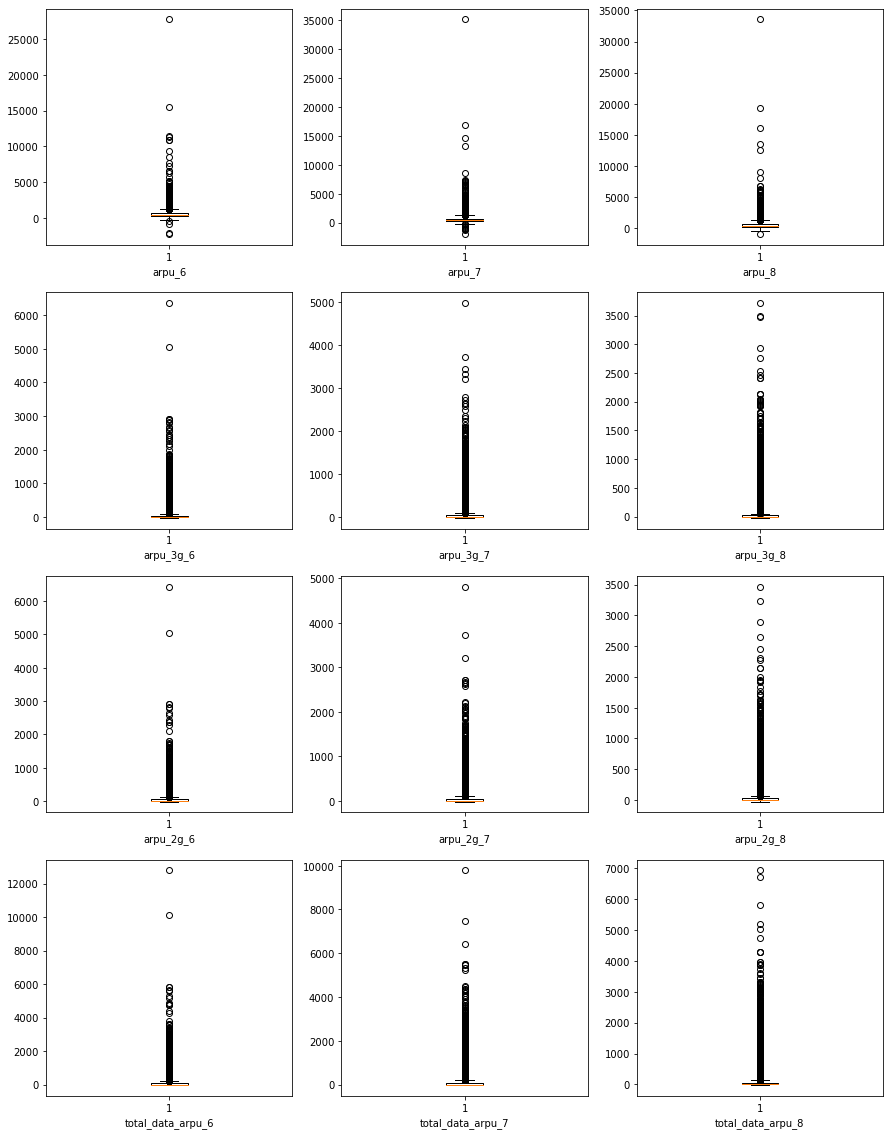

In [52]:
# boxplot of arpu columns
plt.figure(figsize=[15,20])
for i in range(len(arpu_cols)):
  plt.subplot(4,3,i+1)
  plt.boxplot(tele_churn_df[arpu_cols[i]])
  plt.xlabel(arpu_cols[i])

plt.show()

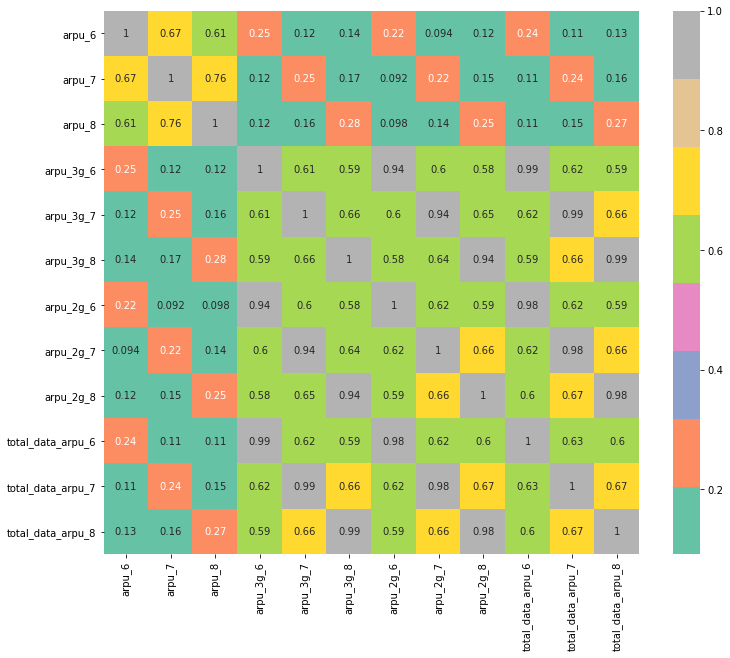

In [53]:
# lets check for correlation heatmap as total_data_arpu derived by some of arpu_2g and arpu_3g
plt.figure(figsize=[12,10])
sns.heatmap(tele_churn_df[arpu_cols].corr(), annot=True, cmap='Set2')
plt.show()

Due to high correlation between the columns we have to drop the features of **arpu_2g|arpu_3g**

In [54]:
# Droping the features with high correlation
arpuDrop_cols = tele_churn_df.columns[tele_churn_df.columns.str.contains('arpu_2g|arpu_3g')]
tele_churn_df.drop(arpuDrop_cols, axis=1, inplace=True)

In [55]:
tele_churn_df.shape

(30001, 98)

In [56]:
# all remaining arpu columns
arpu_cols = tele_churn_df.columns[tele_churn_df.columns.str.contains('arpu')]
arpu_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'total_data_arpu_6', 'total_data_arpu_7',
       'total_data_arpu_8'],
      dtype='object')

In [57]:
# quantiles of apru_8
tele_churn_df.arpu_8.quantile([0.25, 0.50, 0.75, 0.99, 0.995, 1.00])

0.250      231.473
0.500      427.585
0.750      661.491
0.990     1986.622
0.995     2384.432
1.000    33543.624
Name: arpu_8, dtype: float64

In [58]:
tele_churn_df[tele_churn_df.arpu_8 > tele_churn_df.arpu_8.quantile([0.995]).values[0]]

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_vol_mb_6,total_vol_mb_7,total_vol_mb_8,total_data_arpu_6,total_data_arpu_7,total_data_arpu_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_june6,total_rech_amt_july7,total_rech_amt_aug8,av_amt_data_6_7,churn
1,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,422.16,533.91,255.79,60.86,75.14,77.84,487.53,609.24,350.16,427.88,355.23,188.04,180.54,173.08,193.94,626.46,558.04,428.74,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1
62,7002348383,3854.909,2687.582,3117.454,37.09,68.86,5.96,953.01,935.69,1109.74,0.00,0.00,0.00,0.00,0.00,0.00,874.98,886.91,1041.31,21.61,88.19,41.31,1150.03,1100.41,1215.58,838.94,850.39,992.81,15.83,43.19,15.36,1229.71,1219.31,1310.88,6,14,6,3610,3463,3300,1500,1500,550,1000,1500,550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,311,110.90,174.59,297.03,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,3610.0,3463.0,3300.0,3536.5,0
162,7001967063,514.479,-2014.045,3269.790,1161.33,1384.58,1649.49,4129.68,4211.83,3695.91,0.00,0.00,0.00,0.00,0.00,0.00,2401.34,2418.81,2351.61,2877.71,3157.09,2981.33,5291.01,5596.41,5345.71,40.64,48.86,41.49,11.33,15.23,11.44,51.98,64.09,52.94,2,2,0,3011,5011,0,2010,4010,0,2010,4010,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,235,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,3011.0,5011.0,0.0,4011.0,0
909,7001901659,1883.331,3460.129,2938.680,413.39,359.76,576.74,943.94,725.58,951.43,0.00,0.00,0.00,0.00,0.00,0.00,1349.33,1083.01,1508.59,7.51,2.33,8.18,1357.34,1085.34,1528.86,356.49,539.44,256.66,10.94,9.54,2.98,367.44,554.41,259.64,21,30,22,2339,4140,3456,455,455,455,50,130,252,2.0,7.0,8.0,455.0,455.0,455.0,707.0,2170.0,1753.0,34.46,51.87,132.91,3528.01,10248.53,7300.65,0.0,0.0,0.0,0,0,0,0,0,1,2,7,6,0,0,1,1.0,1.0,1.0,2481,2824.37,5486.80,3061.23,208.70,3562.47,10300.4,7433.56,1552.93,4337.81,3281.62,1414.0,15190.0,14024.0,3753.0,19330.0,17480.0,11541.5,0
944,7000556980,3959.954,3461.746,3327.711,9.83,80.01,37.06,487.56,368.54,415.01,0.00,0.00,0.00,0.00,0.00,0.00,29.49,132.89,86.76,21.43,4.41,12.21,498.86,448.56,452.08,6.71,41.94,39.39,29.26,16.08,19.58,97.66,173.04,127.74,42,37,30,4615,4160,3725,200,200,130,110,130,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,248,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,4615.0,4160.0,3725.0,4387.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [59]:
# removing rows that are greater than 99.5 %ile in arpu_8
tele_churn_df = tele_churn_df[tele_churn_df.arpu_8 <= tele_churn_df.arpu_8.quantile([0.995]).values[0]]
tele_churn_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_vol_mb_6,total_vol_mb_7,total_vol_mb_8,total_data_arpu_6,total_data_arpu_7,total_data_arpu_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_june6,total_rech_amt_july7,total_rech_amt_aug8,av_amt_data_6_7,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,5.44,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,113.70,152.08,115.36,424.34,424.34,424.34,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1
2,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,378.09,288.18,63.04,130.26,143.48,98.28,508.36,431.66,171.56,81.43,23.83,15.79,22.43,4.66,0.75,103.86,28.49,16.54,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0.00,0.00,1106.95,11.97,0.00,0.00,19.83,0.0,354.0,207.0,437.0,955.0,327.0,696.0,0
3,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,97.04,94.09,129.74,763.29,934.69,938.79,860.34,1028.79,1068.54,125.33,87.68,159.11,81.76,44.21,101.93,207.09,131.89,261.04,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,600.0,680.0,718.0,640.0,0
4,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,0.0,0.0,0.0,0.0,0.0,131.91,133.68,182.14,2.36,6.35,39.61,134.38,140.04,239.48,116.63,174.41,224.21,2.94,14.89,57.29,119.58,222.89,298.33,3,5,4,0,454,439,0,179,179,0,179,0,0.0,2.0,2.0,0.0,179.0,179.0,0.0,356.0,270.0,0.00,0.48,0.01,0.00,599.09,1009.92,0.0,0.0,0.0,0,0,0,0,0,0,0,2,1,0,0,1,0.0,1.0,1.0,604,40.45,51.86,0.00,0.00,0.00,599.57,1009.93,0.00,608.35,347.94,0.0,712.0,540.0,0.0,1166.0,979.0,583.0,0
5,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,3.48,0.88,40.54,3.18,5.66,1.04,7.89,7.19,41.79,7,14,1,1058,2806,455,252,1255,455,252,0,455,5.0,8.0,1.0,252.0,1255.0,455.0,1057.0,2553.0,455.0,87.05,57.76,7.97,3509.90,8154.65,7701.01,1.0,1.0,0.0,0,0,0,0,0,0,4,5,1,1,3,0,1.0,1.0,1.0,1328,358.10,2706.83,1714.67,0.00,3596.95,8212.41,7708.98,1829.18,4494.23,797.18,5285.0,20424.0,455.0,6343.0,23230.0,910.0,14786.5,0


In [60]:
tele_churn_df.shape

(29851, 98)

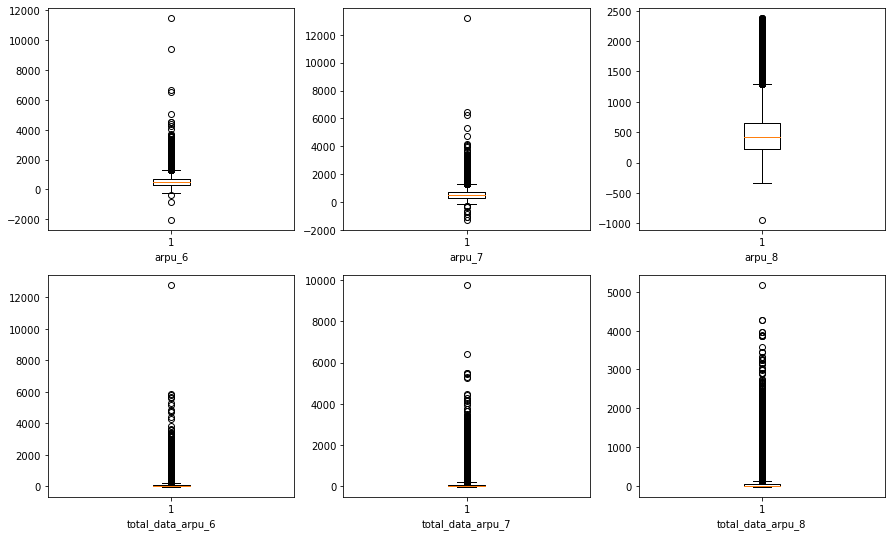

In [61]:
# boxplot of arpu columns
plt.figure(figsize=[15,9])
for i in range(len(arpu_cols)):
  plt.subplot(2,3,i+1)
  plt.boxplot(tele_churn_df[arpu_cols[i]])
  plt.xlabel(arpu_cols[i])

plt.show()

In [62]:
# quantiles of apru_7
tele_churn_df.arpu_7.quantile([0.25, 0.50, 0.75, 0.99, 0.995, 1.00])

0.250      308.8195
0.500      479.4010
0.750      694.3195
0.990     1858.4525
0.995     2137.4750
1.000    13224.1190
Name: arpu_7, dtype: float64

In [63]:
tele_churn_df[tele_churn_df.arpu_7 > tele_churn_df.arpu_7.quantile([0.995]).values[0]]

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_vol_mb_6,total_vol_mb_7,total_vol_mb_8,total_data_arpu_6,total_data_arpu_7,total_data_arpu_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_june6,total_rech_amt_july7,total_rech_amt_aug8,av_amt_data_6_7,churn
5,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,3.48,0.88,40.54,3.18,5.66,1.04,7.89,7.19,41.79,7,14,1,1058,2806,455,252,1255,455,252,0,455,5.0,8.0,1.0,252.0,1255.0,455.0,1057.0,2553.0,455.0,87.05,57.76,7.97,3509.90,8154.65,7701.01,1.0,1.0,0.0,0,0,0,0,0,0,4,5,1,1,3,0,1.0,1.0,1.0,1328,358.10,2706.83,1714.67,0.00,3596.95,8212.41,7708.98,1829.18,4494.23,797.18,5285.0,20424.0,455.0,6343.0,23230.0,910.0,14786.5,0
190,7000185697,1532.473,2332.192,0.000,54.14,13.78,0.00,741.88,910.58,0.00,0.00,17.43,0.00,0.00,24.63,0.00,295.74,166.41,0.00,52.01,42.63,0.00,799.24,909.63,0.00,162.84,128.14,0.00,69.18,81.19,0.00,307.41,402.11,0.00,26,33,0,1843,2704,0,128,200,0,50,110,0,0.0,1.0,0.0,0.0,154.0,0.0,0.0,154.0,0.0,0.00,125.30,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,228,0.00,0.00,0.00,0.00,0.00,125.30,0.00,0.00,0.99,0.00,0.0,154.0,0.0,1843.0,2858.0,0.0,2350.5,1
238,7000138471,2561.259,2619.907,1125.737,2099.68,1478.21,1302.31,5081.01,5194.83,1019.23,83.23,381.08,337.13,732.86,604.24,699.51,977.99,1225.68,362.91,5469.83,4842.98,1257.69,6453.04,6074.43,1624.33,888.36,1252.18,305.44,72.54,524.88,90.06,960.91,1777.06,395.51,30,33,13,3197,3391,1366,120,150,150,120,150,0,1.0,1.0,1.0,25.0,25.0,25.0,25.0,25.0,25.0,0.00,0.03,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,781,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.14,0.00,25.0,25.0,25.0,3222.0,3416.0,1391.0,3319.0,1
358,7000864533,1795.702,2551.372,2051.947,488.14,687.06,572.36,657.84,1100.36,853.46,28.58,246.71,3.95,18.38,264.04,7.33,885.58,1285.56,1238.94,234.18,237.81,179.54,1127.61,1523.38,1418.49,1015.16,962.28,1077.13,68.91,157.74,82.39,1084.08,1120.03,1159.53,12,15,9,2112,3082,2418,252,350,350,250,150,130,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,14.57,32.20,55.47,762.32,399.42,303.60,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,1656,331.38,176.06,64.60,0.00,776.89,431.62,359.07,424.34,476.14,424.34,252.0,252.0,252.0,2364.0,3334.0,2670.0,2849.0,0
400,7000015690,2203.063,2696.881,1083.656,665.08,246.96,157.88,1192.54,1019.46,528.38,0.00,35.68,0.00,0.00,101.88,0.00,1003.26,746.91,580.58,749.54,179.28,15.28,1857.63,1164.54,686.26,390.96,240.73,237.76,33.38,21.01,20.48,454.19,284.76,281.36,27,24,14,2782,3793,1595,250,250,130,120,128,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,216,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,2782.0,3793.0,1595.0,3287.5,0
...,...,...,...,...,...,...,.

In [64]:
# removing rows that are greater than 99.5 %ile in arpu_7
tele_churn_df = tele_churn_df[tele_churn_df.arpu_7 <= tele_churn_df.arpu_7.quantile([0.995]).values[0]]
tele_churn_df.shape

(29701, 98)

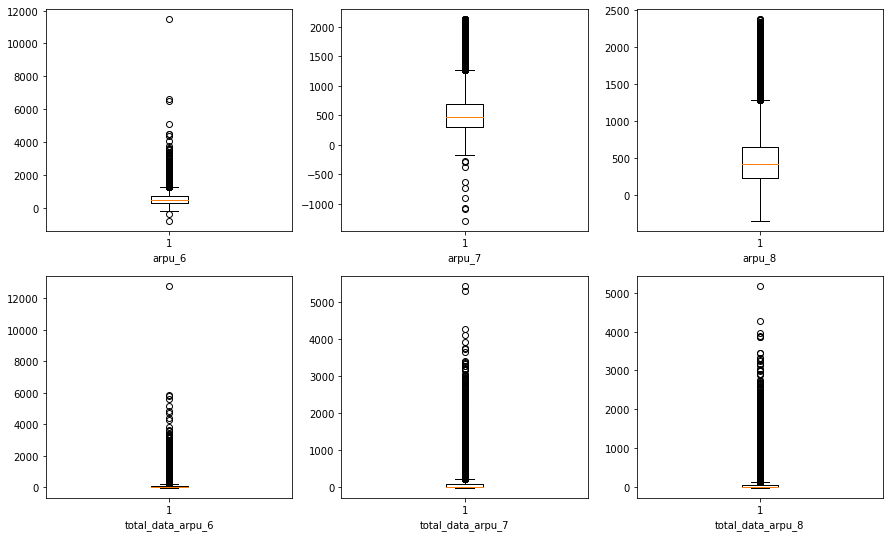

In [65]:
# boxplot of arpu columns
plt.figure(figsize=[15,9])
for i in range(len(arpu_cols)):
  plt.subplot(2,3,i+1)
  plt.boxplot(tele_churn_df[arpu_cols[i]])
  plt.xlabel(arpu_cols[i])

plt.show()

In [66]:
# quantiles of all apru_
for i in arpu_cols:
  print(tele_churn_df[i].quantile([0.25, 0.50, 0.75, 0.99, 0.995, 1.00]))
  print('-'*30)

0.250      308.115
0.500      478.890
0.750      691.712
0.990     1773.143
0.995     2033.116
1.000    11505.508
Name: arpu_6, dtype: float64
------------------------------
0.250     307.7180
0.500     477.8010
0.750     689.4710
0.990    1676.6090
0.995    1858.4525
1.000    2136.7340
Name: arpu_7, dtype: float64
------------------------------
0.250     229.1390
0.500     424.5750
0.750     652.5800
0.990    1740.8580
0.995    1939.1015
1.000    2384.4320
Name: arpu_8, dtype: float64
------------------------------
0.250        0.00
0.500        0.00
0.750       83.73
0.990     1380.70
0.995     1737.09
1.000    12796.04
Name: total_data_arpu_6, dtype: float64
------------------------------
0.250       0.000
0.500       0.000
0.750      82.800
0.990    1429.360
0.995    1821.635
1.000    5451.310
Name: total_data_arpu_7, dtype: float64
------------------------------
0.250       0.000
0.500       0.000
0.750      50.980
0.990    1382.970
0.995    1703.925
1.000    5188.010
Name: total_

In [67]:
# removing rows that are greater than 99.5 %ile in arpu_6, 
tele_churn_df = tele_churn_df[tele_churn_df.arpu_6 <= tele_churn_df.arpu_6.quantile([0.995]).values[0]]
tele_churn_df.shape

(29552, 98)

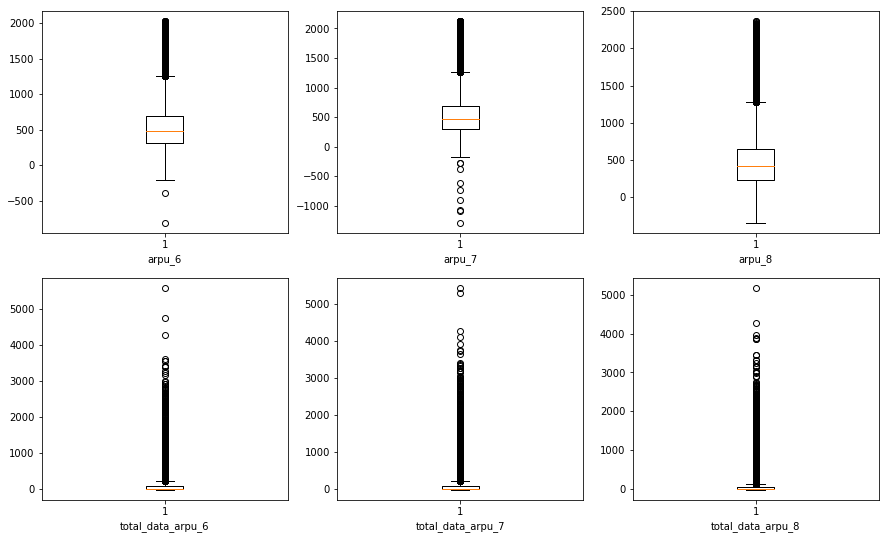

In [68]:
# boxplot of arpu columns
plt.figure(figsize=[15,9])
for i in range(len(arpu_cols)):
  plt.subplot(2,3,i+1)
  plt.boxplot(tele_churn_df[arpu_cols[i]])
  plt.xlabel(arpu_cols[i])

plt.show()

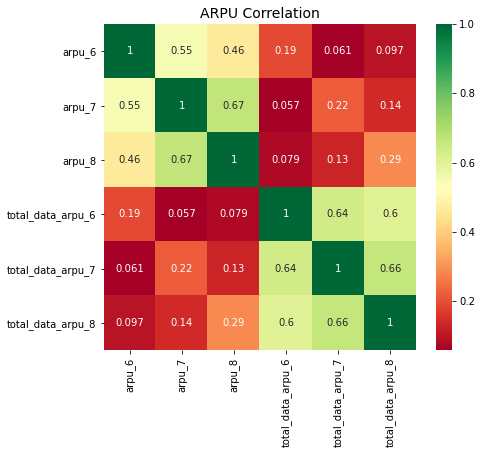

In [69]:
# heatmap plot for all arpu columns
plt.figure(figsize=[7,6])
sns.heatmap(tele_churn_df[arpu_cols].corr(), annot=True, cmap='RdYlGn')
plt.title('ARPU Correlation', fontsize=14)
plt.show()

- There aren't much correlation among them so we could keep all the columns

### Checking outliers for Outgoing Columns

In [70]:
# all outgoing columns
og_cols = tele_churn_df.columns[tele_churn_df.columns.str.contains('og')]
og_cols

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'],
      dtype='object')

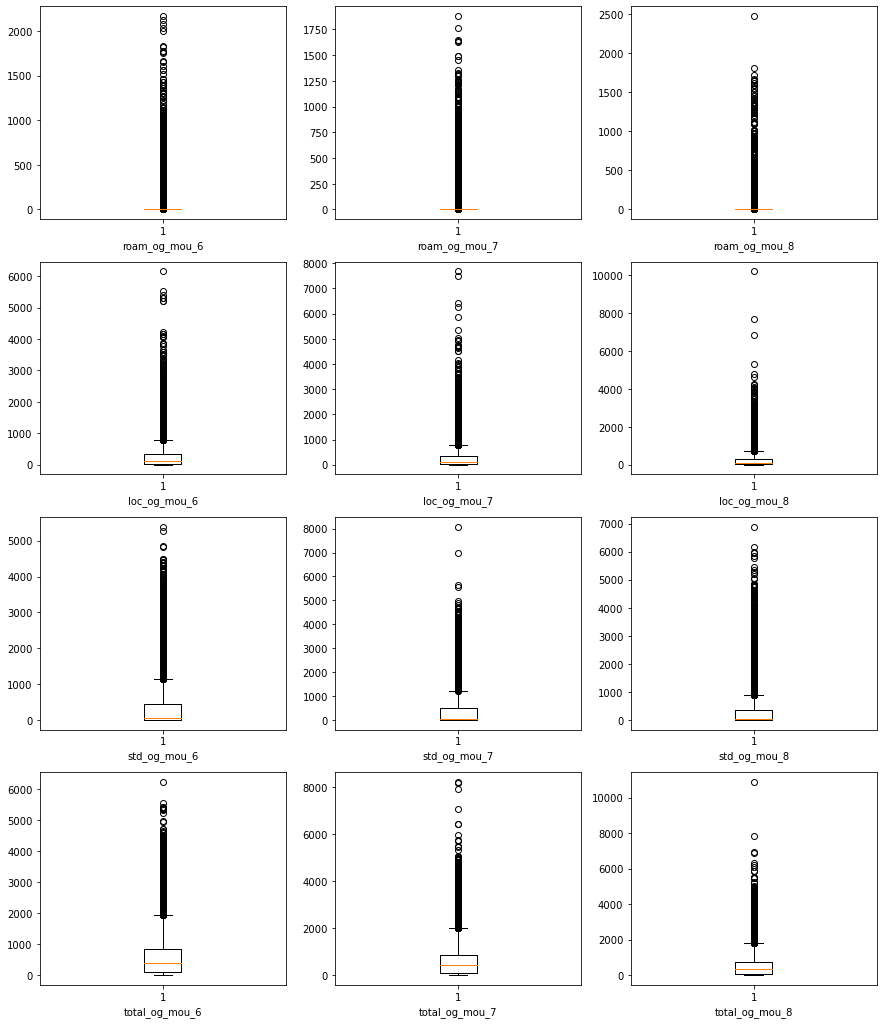

In [71]:
# boxplot of outgoing columns
plt.figure(figsize=[15,18])
for i in range(len(og_cols)):
  plt.subplot(4,3,i+1)
  plt.boxplot(tele_churn_df[og_cols[i]])
  plt.xlabel(og_cols[i])

plt.show()

In [72]:
# all roaming outgoing columns
roam_og_cols = tele_churn_df.columns[tele_churn_df.columns.str.contains('roam_og')]

# quantiles of all roam_og_
for i in roam_og_cols:
  print(tele_churn_df[i].quantile([0.25, 0.50, 0.75, 0.99, 0.995, 1.00]))
  print('-'*30)

0.250       0.0000
0.500       0.0000
0.750       0.0000
0.990     499.4700
0.995     689.3981
1.000    2165.4400
Name: roam_og_mou_6, dtype: float64
------------------------------
0.250       0.0000
0.500       0.0000
0.750       0.0000
0.990     401.2835
0.995     595.0645
1.000    1878.8600
Name: roam_og_mou_7, dtype: float64
------------------------------
0.250       0.0000
0.500       0.0000
0.750       0.0000
0.990     395.2560
0.995     584.5924
1.000    2476.9100
Name: roam_og_mou_8, dtype: float64
------------------------------


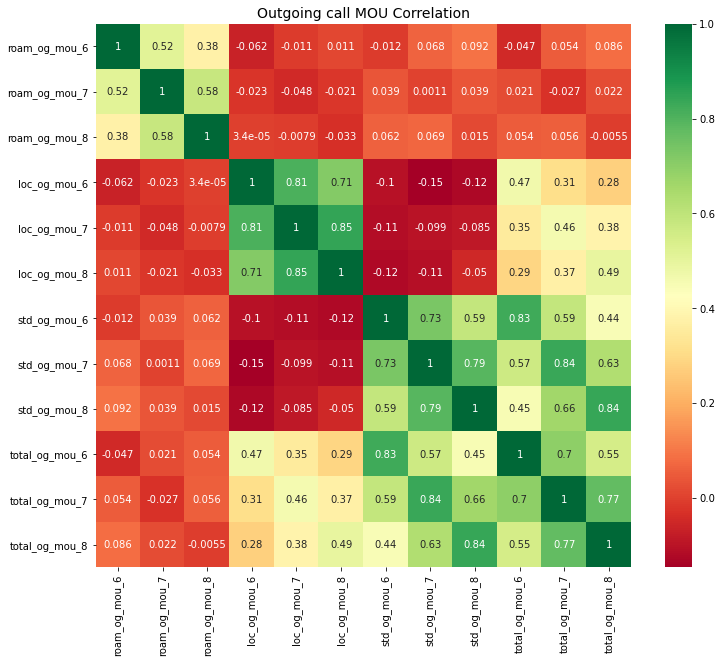

In [73]:
# heatmap plot for all outgoing columns
plt.figure(figsize=[12,10])
sns.heatmap(tele_churn_df[og_cols].corr(), annot=True, cmap='RdYlGn')
plt.title('Outgoing call MOU Correlation', fontsize=14)
plt.show()

### Checking outliers for Incoming Columns

In [74]:
# all incoming columns
ic_cols = tele_churn_df.columns[tele_churn_df.columns.str.contains('ic')]
ic_cols

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'],
      dtype='object')

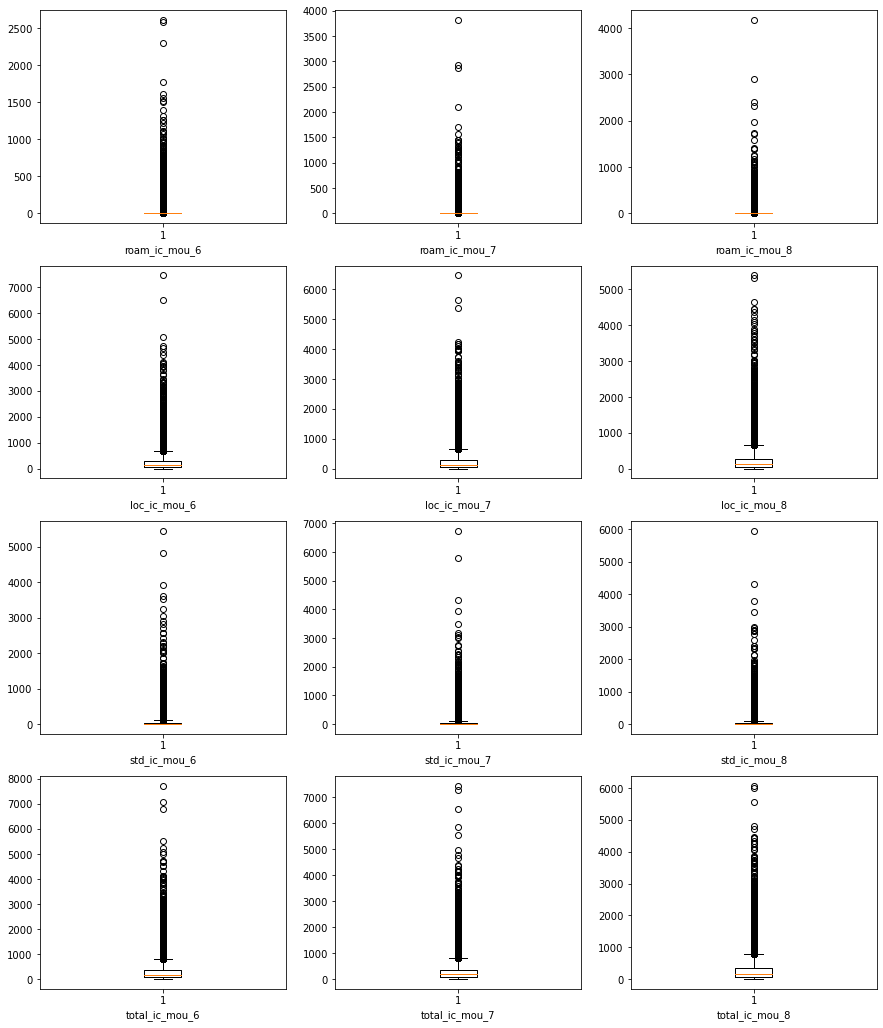

In [75]:
# boxplot of incoming columns
plt.figure(figsize=[15,18])
for i in range(len(ic_cols)):
  plt.subplot(4,3,i+1)
  plt.boxplot(tele_churn_df[ic_cols[i]])
  plt.xlabel(ic_cols[i])

plt.show()

In [76]:
# all roaming incoming columns
roam_ic_cols = tele_churn_df.columns[tele_churn_df.columns.str.contains('roam_ic')]

# quantiles of all roam_ic_
for i in roam_ic_cols:
  print(tele_churn_df[i].quantile([0.25, 0.50, 0.75, 0.99, 0.995, 1.00]))
  print('-'*30)

0.250       0.00000
0.500       0.00000
0.750       0.00000
0.990     329.83490
0.995     468.87865
1.000    2613.31000
Name: roam_ic_mou_6, dtype: float64
------------------------------
0.250       0.0000
0.500       0.0000
0.750       0.0000
0.990     267.9485
0.995     433.1884
1.000    3813.2900
Name: roam_ic_mou_7, dtype: float64
------------------------------
0.250       0.00000
0.500       0.00000
0.750       0.00000
0.990     271.25450
0.995     395.86165
1.000    4169.81000
Name: roam_ic_mou_8, dtype: float64
------------------------------


The Outliers seems to be fine as we have previously performed for outgoing columns

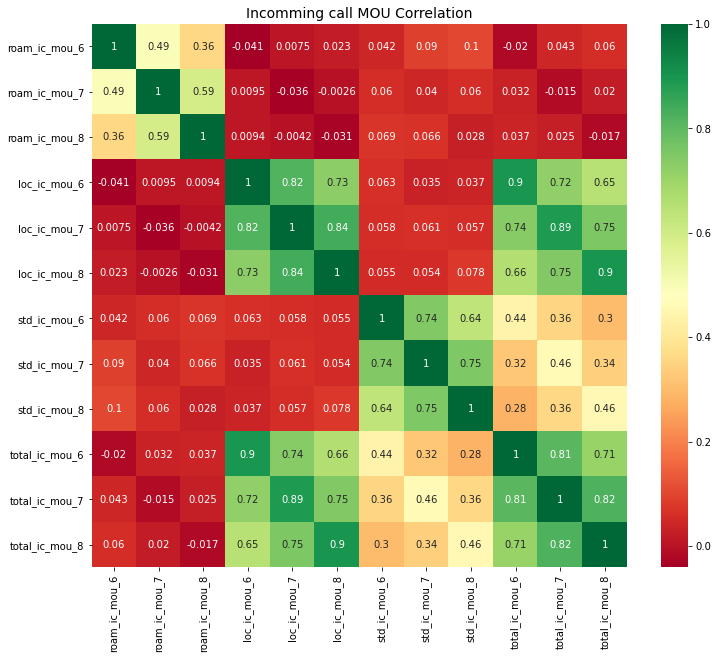

In [77]:
# heatmap plot for all incoming columns
plt.figure(figsize=[12,10])
sns.heatmap(tele_churn_df[ic_cols].corr(), annot=True, cmap='RdYlGn')
plt.title('Incomming call MOU Correlation', fontsize=14)
plt.show()

In [78]:
# all columns
tele_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29552 entries, 0 to 30000
Data columns (total 98 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mobile_number          29552 non-null  int64  
 1   arpu_6                 29552 non-null  float64
 2   arpu_7                 29552 non-null  float64
 3   arpu_8                 29552 non-null  float64
 4   onnet_mou_6            29552 non-null  float64
 5   onnet_mou_7            29552 non-null  float64
 6   onnet_mou_8            29552 non-null  float64
 7   offnet_mou_6           29552 non-null  float64
 8   offnet_mou_7           29552 non-null  float64
 9   offnet_mou_8           29552 non-null  float64
 10  roam_ic_mou_6          29552 non-null  float64
 11  roam_ic_mou_7          29552 non-null  float64
 12  roam_ic_mou_8          29552 non-null  float64
 13  roam_og_mou_6          29552 non-null  float64
 14  roam_og_mou_7          29552 non-null  float64
 15  ro

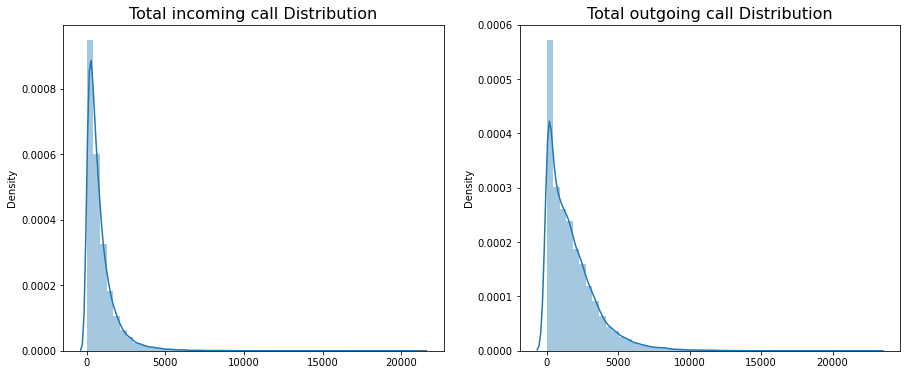

In [79]:
# Distribution of total incoming and total outgoing in 3 months
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.distplot(tele_churn_df[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']].sum(axis=1))
plt.title('Total incoming call Distribution', fontsize=16)

plt.subplot(1,2,2)
sns.distplot(tele_churn_df[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].sum(axis=1))
plt.title('Total outgoing call Distribution', fontsize=16)
plt.show()

- Both are left skewed

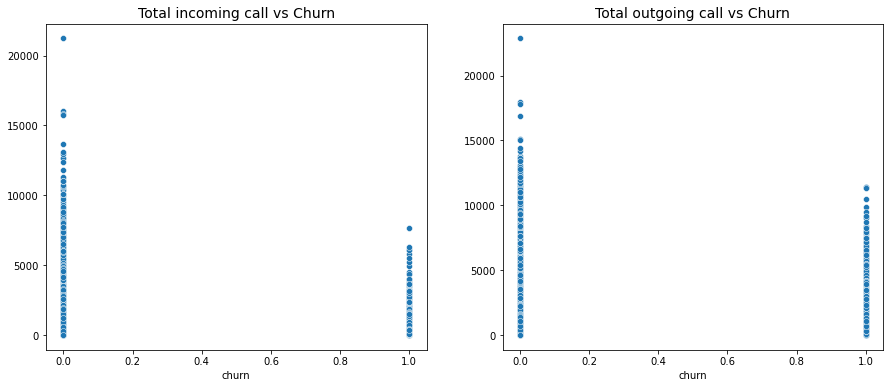

In [80]:
# Ploting graph for incoming, outgoing call with churn
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.scatterplot(x=tele_churn_df['churn'], y=tele_churn_df[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']].sum(axis=1))
plt.title('Total incoming call vs Churn', fontsize=14)

plt.subplot(1,2,2)
sns.scatterplot(x=tele_churn_df['churn'], y=tele_churn_df[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].sum(axis=1))
plt.title('Total outgoing call vs Churn', fontsize=14)
plt.show()

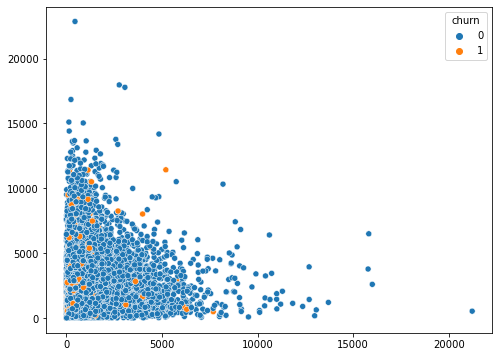

In [81]:
# plot incoming vs outgoing along with churn
plt.figure(figsize=[8,6])
sns.scatterplot(x=tele_churn_df[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']].sum(axis=1),
                y=tele_churn_df[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].sum(axis=1), hue=tele_churn_df.churn)
plt.show()




Text(0.5, 1.0, 'Total MOU vs Churn')

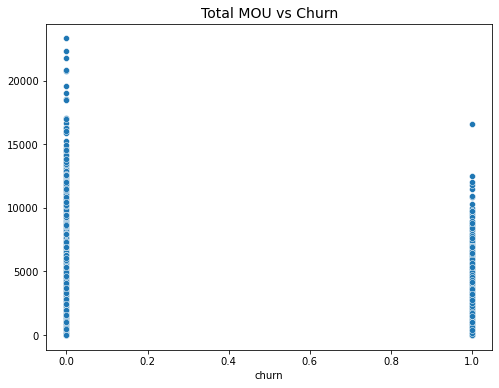

In [82]:
# Ploting graph for incoming, outgoing call with churn
plt.figure(figsize=[8,6])
sns.scatterplot(x=tele_churn_df['churn'], y=tele_churn_df[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
                                                           'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].sum(axis=1))
plt.title('Total MOU vs Churn', fontsize=14)

- Clearly, we can see that Churn rate is more where the MOUs are less for both Incomming and Outgoing calls

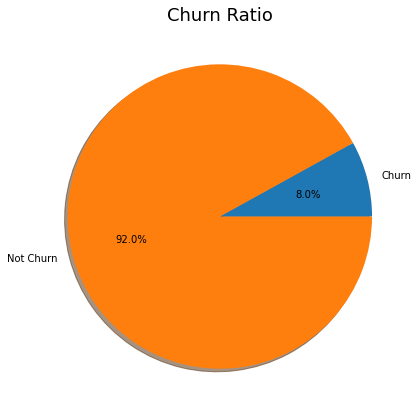

In [83]:
# Ploting churn ratio
total_churn_values = tele_churn_df.churn.value_counts(ascending=True).values

plt.figure(figsize=[7,7])
plt.pie(total_churn_values, labels=['Churn', 'Not Churn'], autopct='%1.1f%%', shadow=True)
plt.title('Churn Ratio', fontsize=18)
plt.show()

- Churn rate is very less with 8%

### Visualizing columns present Volume of data

In [84]:
# all vol columns
vol_cols = tele_churn_df.columns[tele_churn_df.columns.str.contains('vol')]
vol_cols

Index(['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'total_vol_mb_6', 'total_vol_mb_7',
       'total_vol_mb_8'],
      dtype='object')

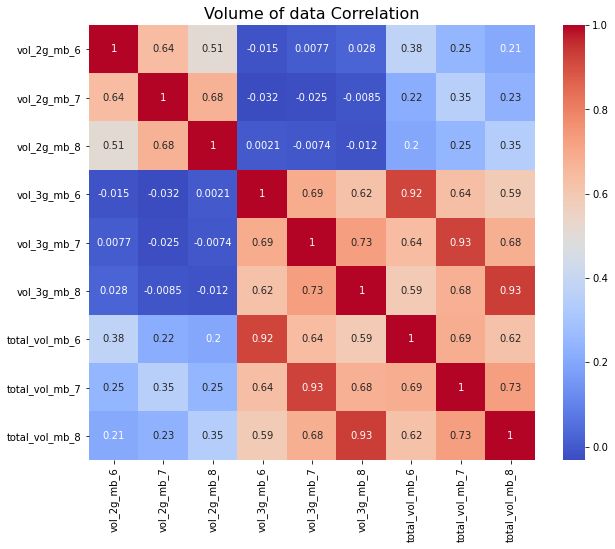

In [85]:
# check for correlation among vol_cols
plt.figure(figsize=[10,8])
sns.heatmap(tele_churn_df[vol_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Volume of data Correlation', fontsize=16)
plt.show()

#### Action phase

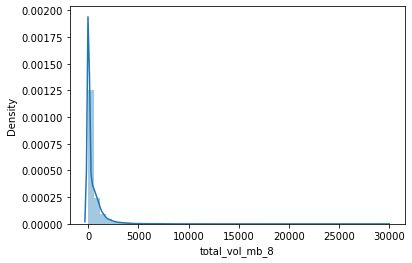

In [86]:
# total data distribution in month 8
plt.figure()
sns.distplot(tele_churn_df['total_vol_mb_8'])
plt.show()

### SACHET columns

In [87]:
# all sachet columns
sachet_cols = tele_churn_df.columns[tele_churn_df.columns.str.contains('sachet')]
sachet_cols

Index(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

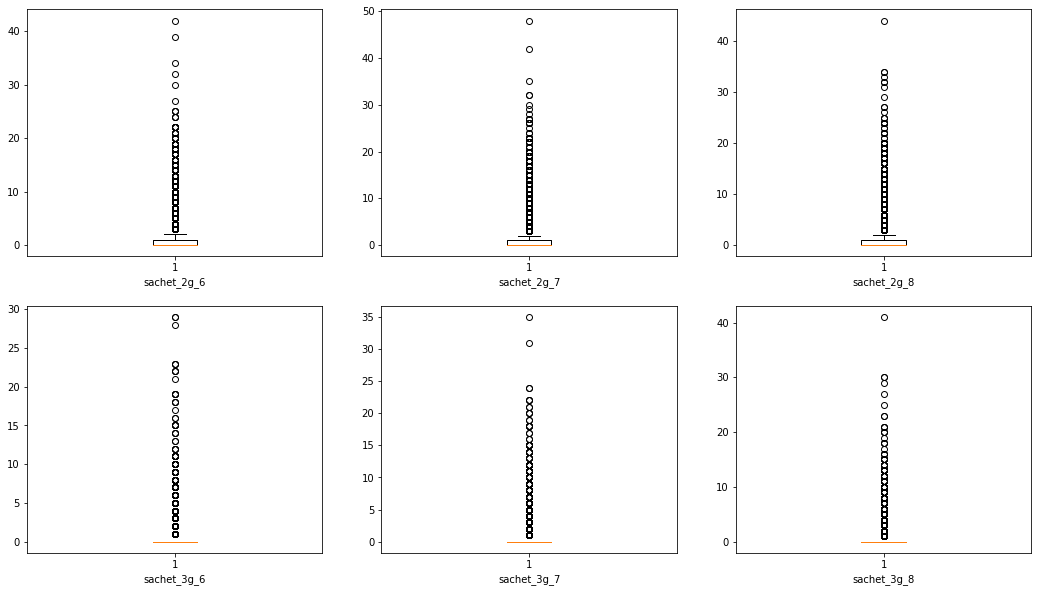

In [88]:
# boxplot of sachet columns
plt.figure(figsize=[18,10])
for i in range(len(sachet_cols)):
  plt.subplot(2,3,i+1)
  plt.boxplot(tele_churn_df[sachet_cols[i]])
  plt.xlabel(sachet_cols[i])

plt.show()

#### Check in action phase(i.e., Month 8)

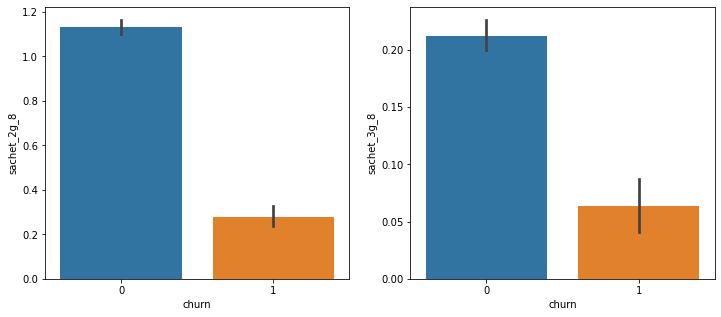

In [89]:
# barplot
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
sns.barplot(x=tele_churn_df['churn'], y=tele_churn_df['sachet_2g_8'])

plt.subplot(1,2,2)
sns.barplot(x=tele_churn_df['churn'], y=tele_churn_df['sachet_3g_8'])
plt.show()

### ONNET/OFFNET Columns

In [90]:
# all onnet/offnet columns
onoff_cols = tele_churn_df.columns[tele_churn_df.columns.str.contains('onnet|offnet')]
onoff_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8'],
      dtype='object')

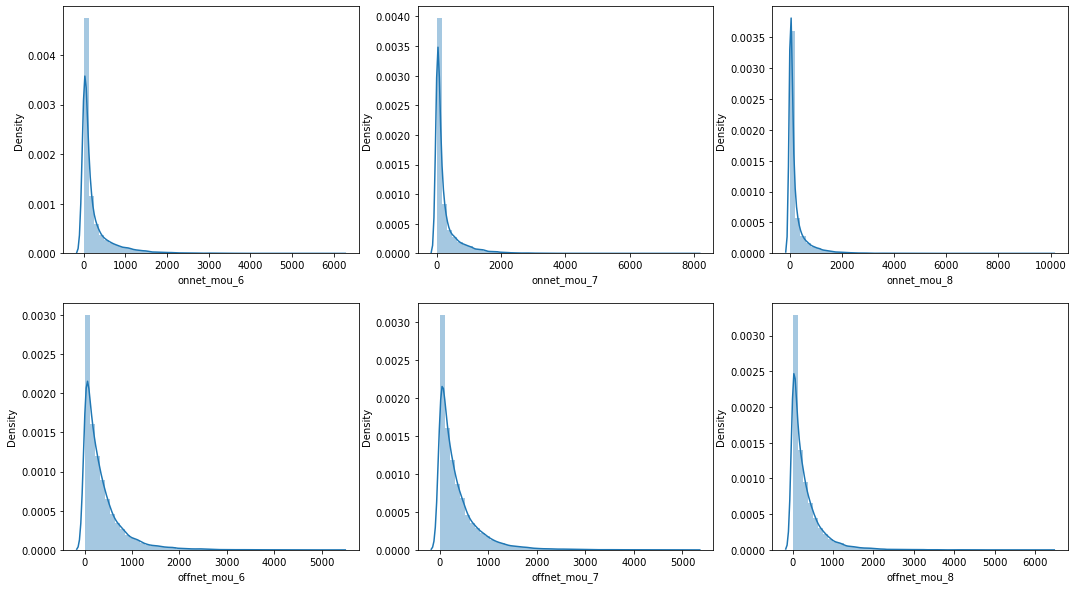

In [91]:
# distplot of onnet/offnet columns
plt.figure(figsize=[18,10])
for i in range(len(onoff_cols)):
  plt.subplot(2,3,i+1)
  sns.distplot(tele_churn_df[onoff_cols[i]])
  plt.xlabel(onoff_cols[i])

plt.show()

This means most of the people has mou's upto 1000 in every cases

#### Check in action phase(i.e., Month 8) 

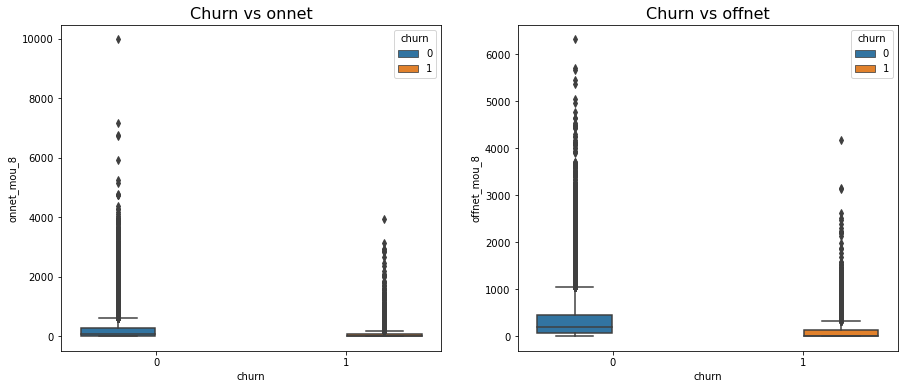

In [92]:
# boxplot 
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.boxplot(x=tele_churn_df['churn'], y=tele_churn_df['onnet_mou_8'], hue= tele_churn_df['churn'])
plt.title('Churn vs onnet', fontsize=16)

plt.subplot(1,2,2)
sns.boxplot(x=tele_churn_df['churn'], y=tele_churn_df['offnet_mou_8'], hue= tele_churn_df['churn'])
plt.title('Churn vs offnet', fontsize=16)
plt.show()

In [93]:
# all *_mou_8 columns
mou_8_cols = tele_churn_df.columns[tele_churn_df.columns.str.contains('mou_8')]
mou_8_cols

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8'],
      dtype='object')

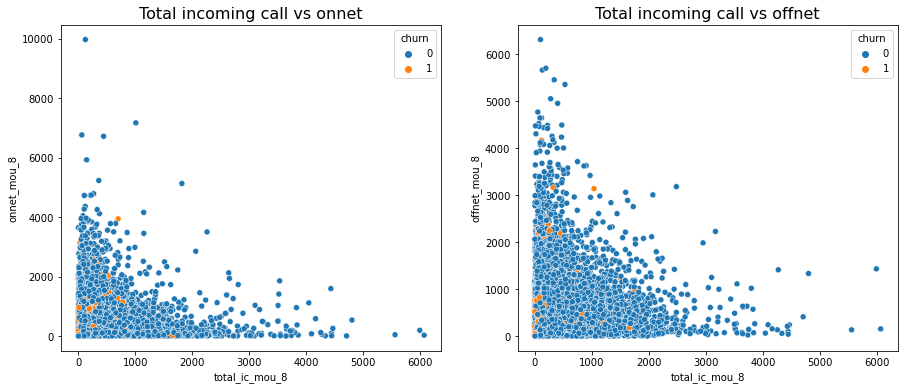

In [94]:
# compare incoming calls with onnet and offnet calls
# scatterplot
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.scatterplot(x=tele_churn_df['total_ic_mou_8'], y=tele_churn_df['onnet_mou_8'], hue= tele_churn_df['churn'])
plt.title('Total incoming call vs onnet', fontsize=16)

plt.subplot(1,2,2)
sns.scatterplot(x=tele_churn_df['total_ic_mou_8'], y=tele_churn_df['offnet_mou_8'], hue= tele_churn_df['churn'])
plt.title('Total incoming call vs offnet', fontsize=16)
plt.show()

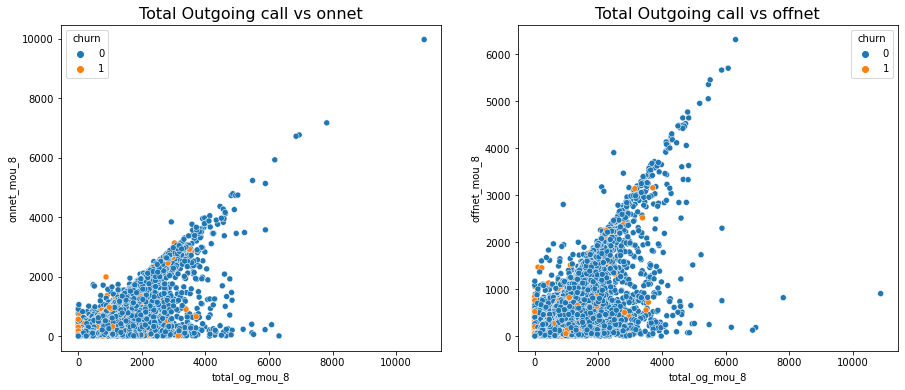

In [95]:
# compare outgoing calls with onnet and offnet calls
# scatterplot
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.scatterplot(x=tele_churn_df['total_og_mou_8'], y=tele_churn_df['onnet_mou_8'], hue= tele_churn_df['churn'])
plt.title('Total Outgoing call vs onnet', fontsize=16)

plt.subplot(1,2,2)
sns.scatterplot(x=tele_churn_df['total_og_mou_8'], y=tele_churn_df['offnet_mou_8'], hue= tele_churn_df['churn'])
plt.title('Total Outgoing call vs offnet', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

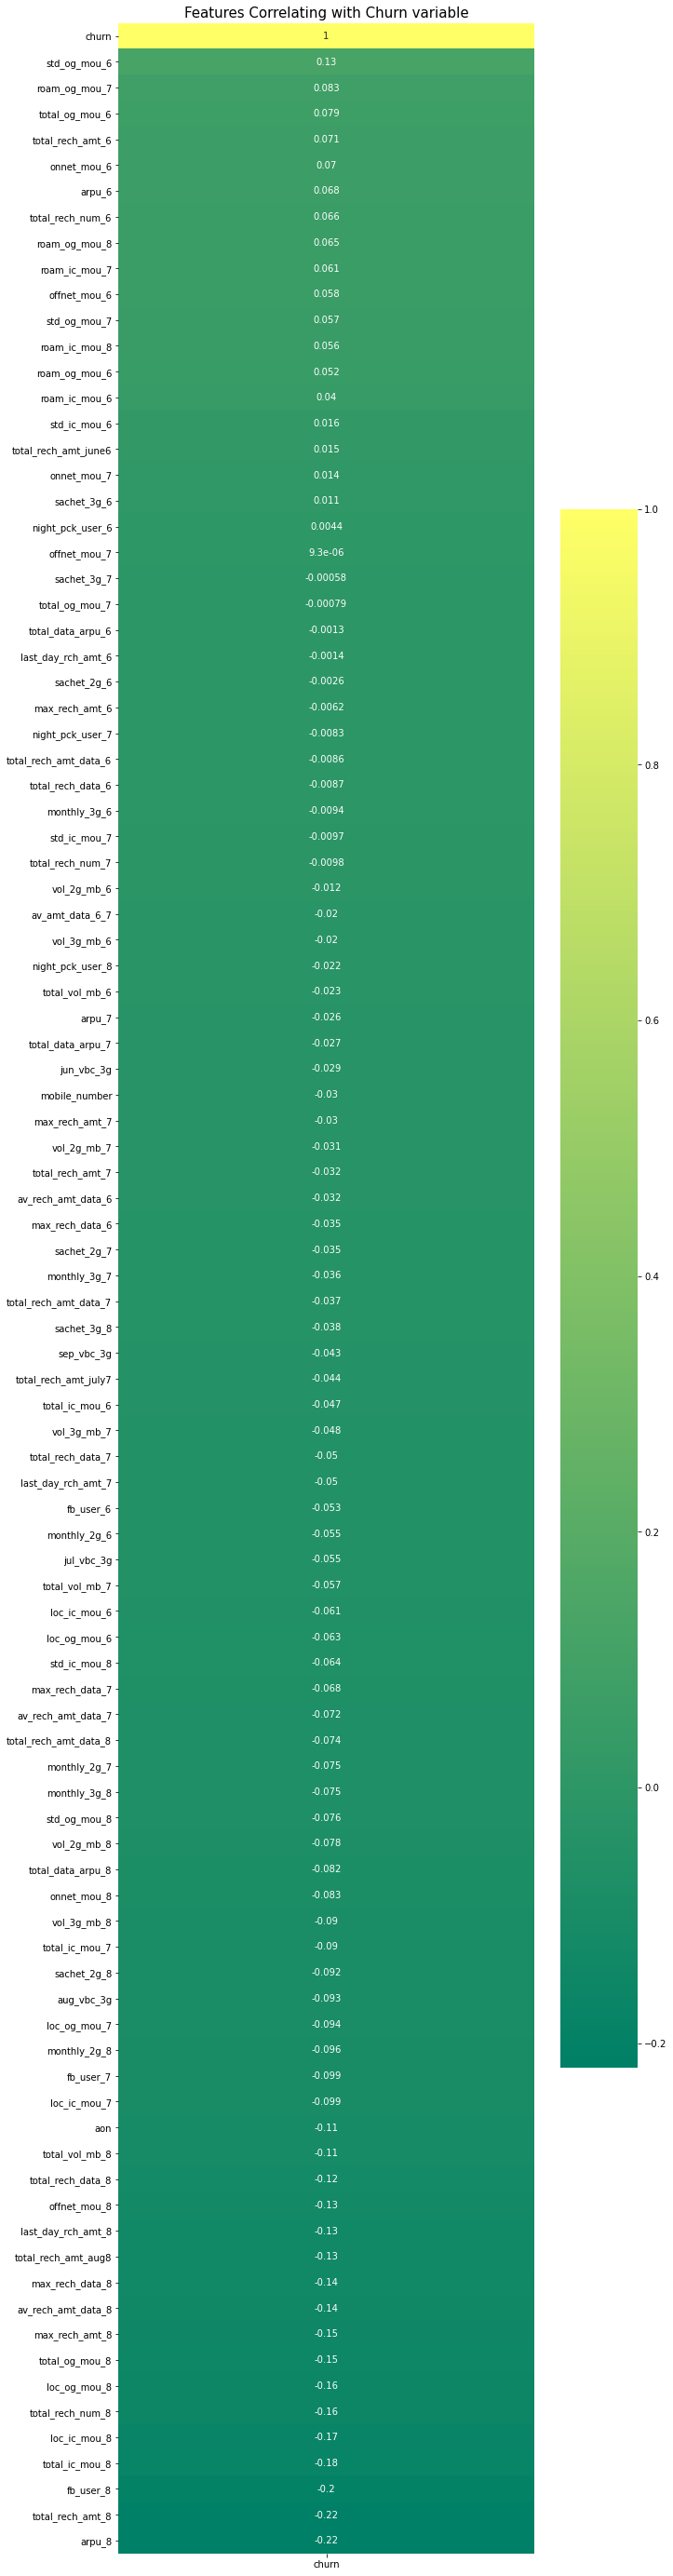

In [96]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
cor_var = sns.heatmap(tele_churn_df.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
cor_var.set_title("Features Correlating with Churn variable", fontsize=15)

## Train-Test Split

In [97]:
# import train test split library
from sklearn.model_selection import train_test_split

X = tele_churn_df.drop(['mobile_number', 'churn'], axis=1)
y = tele_churn_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=100)

print("X=",X_train.shape, X_test.shape)
print("y=",y_test.shape, y_test.shape)

X= (20686, 96) (8866, 96)
y= (8866,) (8866,)


### Feature Scaling

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [99]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_vol_mb_6,total_vol_mb_7,total_vol_mb_8,total_data_arpu_6,total_data_arpu_7,total_data_arpu_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_june6,total_rech_amt_july7,total_rech_amt_aug8,av_amt_data_6_7
28947,-0.235056,-1.241587,-1.345105,-0.538648,-0.496848,-0.525988,-0.269195,-0.579072,-0.740452,-0.213273,-0.164997,-0.173954,-0.240295,-0.196170,-0.205113,-0.623784,-0.540912,-0.663866,-0.227163,-0.472043,-0.527433,-0.505108,-0.707410,-0.822527,-0.717386,-0.722476,-0.729910,0.080304,-0.312490,-0.315786,-0.622591,-0.754261,-0.781506,1.455732,-0.281536,-0.646580,-0.288573,-1.194665,-1.272455,-0.622096,-0.729336,-1.028953,-0.688430,-0.759152,-0.702863,1.175257,-0.615409,-0.557121,-0.554851,-0.707940,-0.664849,-0.243799,-0.715203,-0.657168,0.608699,-0.379071,-0.349790,-0.425340,-0.440132,-0.424524,-0.117139,-0.109253,-0.103203,-0.40517,-0.407822,-0.380318,1.555248,-0.452970,-0.424185,-0.366708,-0.360064,-0.353245,-0.215364,-0.215014,-0.190283,0.953881,-1.063710,-0.963258,-0.737605,-0.413169,-0.414547,-0.393090,-0.157104,-0.155208,-0.557118,-0.523465,-0.438266,-0.414508,-0.402477,-0.015952,-0.399622,-0.314788,-0.108436,-0.738669,-0.657630,-0.510674
23488,-0.504685,-0.273650,-0.308914,-0.463130,-0.408408,0.028611,-0.410315,-0.226014,-0.517525,-0.213273,-0.164997,-0.173954,-0.240295,-0.214861,-0.205113,-0.188265,0.066219,0.290231,-0.590833,-0.538140,-0.527433,-0.560854,-0.408843,-0.304925,-0.097849,-0.174615,-0.244132,-0.278493,-0.183047,-0.275696,-0.224355,-0.256150,-0.348881,-0.623022,-0.606237,-0.094125,-0.545827,-0.299323,0.161186,0.560346,0.539787,1.215421,1.222112,-0.759152,-0.702863,-0.241077,-0.285137,0.131552,1.583499,1.526867,1.648611,0.670780,0.587201,2.093390,-0.180475,-0.252178,-0.121497,0.890044,1.143945,0.783732,-0.117139,-0.109253,-0.103203,-0.40517,-0.407822,-0.380318,-0.430179,-0.452970,-0.424185,1.370746,1.271900,3.119767,-0.215364,-0.215014,-0.190283,0.953881,0.940106,1.038144,1.975954,1.448880,2.222648,1.414706,-0.157104,0.757392,0.973017,0.692472,1.027949,0.970387,2.546575,-0.165727,-0.201468,0.403295,-0.332912,-0.280730,0.420233,-0.355853
5607,-0.136682,-0.182858,-0.304958,-0.422612,-0.477441,-0.445020,0.988474,1.115079,1.200037,-0.196428,-0.164997,-0.173954,0.025329,-0.214861,-0.205113,-0.633740,-0.610970,-0.633139,0.837441,0.903690,1.026059,0.398158,0.465949,0.539055,-0.643332,-0.716032,-0.669597,-0.290521,-0.319911,-0.302423,-0.702581,-0.776076,-0.717610,-0.075982,-0.173302,-0.315107,0.049388,-0.394990,-0.224794,-0.347258,-0.352369,-0.168279,0.101050,0.100188,0.317271,-0.595160,-0.615409,-0.557121,-0.709540,-0.707940,-0.664849,-0.709303,-0.715203,-0.657168,-0.386967,-0.379071,-0.349790,-0.425340,-0.440132,-0.424524,-0.117139,-0.109253,-0.103203,-0.40517,-0.407822,-0.380318,-0.430179,-0.452970,-0.424185,-0.366708,-0.360064,-0.353245,-0.215364,-0.21501

#### Data Imbalance Handling

Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [100]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [101]:
print("Dimension of X_train_sm Shape:", X_train.shape)
print("Dimension of y_train_sm Shape:", y_train.shape)

Dimension of X_train_sm Shape: (38048, 96)
Dimension of y_train_sm Shape: (38048,)


In [102]:
X_train = pd.DataFrame(data=X_train, columns=cols)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.shape: (38048, 96)
y_train.shape: (38048,)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_vol_mb_6,total_vol_mb_7,total_vol_mb_8,total_data_arpu_6,total_data_arpu_7,total_data_arpu_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_june6,total_rech_amt_july7,total_rech_amt_aug8,av_amt_data_6_7
0,-0.235056,-1.241587,-1.345105,-0.538648,-0.496848,-0.525988,-0.269195,-0.579072,-0.740452,-0.213273,-0.164997,-0.173954,-0.240295,-0.196170,-0.205113,-0.623784,-0.540912,-0.663866,-0.227163,-0.472043,-0.527433,-0.505108,-0.707410,-0.822527,-0.717386,-0.722476,-0.729910,0.080304,-0.312490,-0.315786,-0.622591,-0.754261,-0.781506,1.455732,-0.281536,-0.646580,-0.288573,-1.194665,-1.272455,-0.622096,-0.729336,-1.028953,-0.688430,-0.759152,-0.702863,1.175257,-0.615409,-0.557121,-0.554851,-0.707940,-0.664849,-0.243799,-0.715203,-0.657168,0.608699,-0.379071,-0.349790,-0.425340,-0.440132,-0.424524,-0.117139,-0.109253,-0.103203,-0.40517,-0.407822,-0.380318,1.555248,-0.452970,-0.424185,-0.366708,-0.360064,-0.353245,-0.215364,-0.215014,-0.190283,0.953881,-1.063710,-0.963258,-0.737605,-0.413169,-0.414547,-0.393090,-0.157104,-0.155208,-0.557118,-0.523465,-0.438266,-0.414508,-0.402477,-0.015952,-0.399622,-0.314788,-0.108436,-0.738669,-0.657630,-0.510674
1,-0.504685,-0.273650,-0.308914,-0.463130,-0.408408,0.028611,-0.410315,-0.226014,-0.517525,-0.213273,-0.164997,-0.173954,-0.240295,-0.214861,-0.205113,-0.188265,0.066219,0.290231,-0.590833,-0.538140,-0.527433,-0.560854,-0.408843,-0.304925,-0.097849,-0.174615,-0.244132,-0.278493,-0.183047,-0.275696,-0.224355,-0.256150,-0.348881,-0.623022,-0.606237,-0.094125,-0.545827,-0.299323,0.161186,0.560346,0.539787,1.215421,1.222112,-0.759152,-0.702863,-0.241077,-0.285137,0.131552,1.583499,1.526867,1.648611,0.670780,0.587201,2.093390,-0.180475,-0.252178,-0.121497,0.890044,1.143945,0.783732,-0.117139,-0.109253,-0.103203,-0.40517,-0.407822,-0.380318,-0.430179,-0.452970,-0.424185,1.370746,1.271900,3.119767,-0.215364,-0.215014,-0.190283,0.953881,0.940106,1.038144,1.975954,1.448880,2.222648,1.414706,-0.157104,0.757392,0.973017,0.692472,1.027949,0.970387,2.546575,-0.165727,-0.201468,0.403295,-0.332912,-0.280730,0.420233,-0.355853
2,-0.136682,-0.182858,-0.304958,-0.422612,-0.477441,-0.445020,0.988474,1.115079,1.200037,-0.196428,-0.164997,-0.173954,0.025329,-0.214861,-0.205113,-0.633740,-0.610970,-0.633139,0.837441,0.903690,1.026059,0.398158,0.465949,0.539055,-0.643332,-0.716032,-0.669597,-0.290521,-0.319911,-0.302423,-0.702581,-0.776076,-0.717610,-0.075982,-0.173302,-0.315107,0.049388,-0.394990,-0.224794,-0.347258,-0.352369,-0.168279,0.101050,0.100188,0.317271,-0.595160,-0.615409,-0.557121,-0.709540,-0.707940,-0.664849,-0.709303,-0.715203,-0.657168,-0.386967,-0.379071,-0.349790,-0.425340,-0.440132,-0.424524,-0.117139,-0.109253,-0.103203,-0.40517,-0.407822,-0.380318,-0.430179,-0.452970,-0.424185,-0.366708,-0.360064,-0.353245,-0.215364,-0.215014,-0.190283

## Logistic Regression

In [103]:
import statsmodels.api as sm

logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38048
Model:                            GLM   Df Residuals:                    37961
Model Family:                Binomial   Df Model:                           86
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14217.
Date:                Wed, 03 Nov 2021   Deviance:                       28434.
Time:                        21:51:27   Pearson chi2:                 2.31e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.3968      0.047    -50.771      0.000      -2.489      -2.304
arpu_6                    0.0852      0.054      1.574      0.116      -0.021       0.191
arpu_7                    0.1289      0.060      2.146      0.032       0.011       0.247
arpu_8                    0.3542      0.074      4.811      0.000       0.210       0.499
onnet_mou_6               2.9772      1.513      1.968      0.049       0.011       5.943
onnet_mou_7              -1.7811      1.434     -1.242      0.214      -4.591       1.029
onnet_mou_8               4.7092      1.801      2.615      0.009       1.179       8.239
offnet_mou_6              2.9400      1.560      1.885      0.059      -0.118       5.998
offnet_mou_7             -1.6610      1.438     -1.155      0.248      -4.480       1.158
offnet_mou_8              4.6911      1.830      2.564      0.010       1.105       8.277
roam_ic_mou_6             0.0427      0.024      1.756      0.079      -0.005       0.090
roam_ic_mou_7             0.0283      0.024      1.160      0.246      -0.020       0.076
roam_ic_mou_8             0.0031      0.017      0.186      0.853      -0.029       0.036
roam_og_mou_6            -0.7116      0.359     -1.984      0.047      -1.414      -0.009
roam_og_mou_7             0.3633      0.269      1.349      0.177      -0.164       0.891
roam_og_mou_8            -0.9286      0.370     -2.513      0.012      -1.653      -0.204
loc_og_mou_6             -1.2942      0.413     -3.137      0.002      -2.103      -0.485
loc_og_mou_7              0.2752      0.444      0.620      0.535      -0.595       1.146
loc_og_mou_8              0.8416      0.498      1.688      0.091      -0.135       1.819
std_og_mou_6             -1.7786      0.654     -2.720      0.007      -3.060      -0.497
std_og_mou_7              0.0526      0.728      0.072      0.942      -1.373       1.479
std_og_mou_8              2.6137      0.805      3.246      0.001       1.036       4.192
total_og_mou_6           -2.3276      2.011     -1.157      0.247      -6.269       1.614
total_og_mou_7            2.6640      1.897      1.405      0.160      -1.053       6.381
total_og_mou_8          -10.6245      2.487     -4.273      0.000     -15.498      -5.751
loc_ic_mou_6              0.2625      0.165      1.594      0.111      -0.060       0.585
loc_ic_mou_7             -0.0442      0.178     -0.248      0.804      -0.394       0.306
loc_ic_mou_8             -1.4223      0.187     -7.593      0.000      -1.789      -1.055
std_ic_mou_6              0.1605      0.079      2.024      0.043       0.005       0.316
std_ic_mou_7             -0.3025      0.088     -3.434      0.001      -0.475      -0.130
std_ic_mou_8             -0.2214      0.094     -2.354      0.019      -0.406      -0.037
total_ic_mou_6         

### LogRegg using RFE

In [104]:
# import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# import RFE from sklearn.feature_selection
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [105]:
# features that are selected are:
col = X_train.columns[rfe.support_]
col

Index(['arpu_7', 'onnet_mou_8', 'offnet_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_7', 'total_rech_data_8',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'monthly_2g_8',
       'sachet_2g_7', 'sachet_3g_7', 'fb_user_8', 'aon', 'aug_vbc_3g',
       'sep_vbc_3g', 'total_data_arpu_7', 'total_rech_amt_data_8'],
      dtype='object')

**Building the model with selected columns**

In [106]:
# assessing the statsmodel after RFE
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38048
Model:                            GLM   Df Residuals:                    38022
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14559.
Date:                Wed, 03 Nov 2021   Deviance:                       29117.
Time:                        21:52:35   Pearson chi2:                 3.08e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.3264      0.046    -50.359      0.000      -2.417      -2.236
arpu_7                    0.4578      0.022     20.840      0.000       0.415       0.501
onnet_mou_8               0.3743      0.070      5.330      0.000       0.237       0.512
offnet_mou_8              0.3209      0.071      4.535      0.000       0.182       0.460
std_og_mou_8              1.0865      0.078     13.920      0.000       0.934       1.240
total_og_mou_8           -2.2184      0.131    -16.968      0.000      -2.475      -1.962
loc_ic_mou_6              0.4218      0.038     11.218      0.000       0.348       0.496
loc_ic_mou_8             -1.5750      0.133    -11.857      0.000      -1.835      -1.315
std_ic_mou_8             -0.3280      0.066     -4.972      0.000      -0.457      -0.199
total_ic_mou_7            0.4220      0.047      8.945      0.000       0.330       0.514
total_ic_mou_8           -0.5658      0.140     -4.048      0.000      -0.840      -0.292
total_rech_num_8         -0.7011      0.028    -24.627      0.000      -0.757      -0.645
last_day_rch_amt_8       -0.3840      0.021    -18.054      0.000      -0.426      -0.342
total_rech_data_7        -0.6585      0.152     -4.322      0.000      -0.957      -0.360
total_rech_data_8        -0.3479      0.070     -4.990      0.000      -0.485      -0.211
av_rech_amt_data_7       -0.3578      0.047     -7.547      0.000      -0.451      -0.265
av_rech_amt_data_8        0.0188      0.061      0.311      0.756      -0.100       0.137
monthly_2g_8             -0.2724      0.032     -8.402      0.000      -0.336      -0.209
sachet_2g_7               0.8135      0.127      6.392      0.000       0.564       1.063
sachet_3g_7               0.3866      0.050      7.778      0.000       0.289       0.484
fb_user_8                -0.4753      0.034    -13.791      0.000      -0.543      -0.408
aon                      -0.4175      0.019    -21.522      0.000      -0.456      -0.379
aug_vbc_3g               -0.2801      0.035     -8.020      0.000      -0.349      -0.212
sep_vbc_3g               -2.6327      0.231    -11.404      0.000      -3.085      -2.180
total_data_arpu_7         0.4553      0.039     11.607      0.000       0.378       0.532
total_rech_amt_data_8    -0.8220      0.161     -5.102      0.000      -1.138      -0.506
=========================================================================================
"""

- All the feature are significant here!
<br>
- So, lets check for VIFs

**Checking VIFs**

In [107]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,total_rech_data_7,74.28
17,sachet_2g_7,49.85
4,total_og_mou_8,47.33
9,total_ic_mou_8,42.76
6,loc_ic_mou_8,31.88
2,offnet_mou_8,19.56
1,onnet_mou_8,17.89
18,sachet_3g_7,8.78
14,av_rech_amt_data_7,7.44
7,std_ic_mou_8,6.22


Remove 'total_rech_data_7' column as it has high-VIF.

In [109]:
col = col.drop('total_rech_data_7', 1)
len(col)

24

**Build the model again after remoing 'total_rech_data_7' column**

In [110]:
# re-build the model
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38048
Model:                            GLM   Df Residuals:                    38023
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14568.
Date:                Wed, 03 Nov 2021   Deviance:                       29136.
Time:                        21:52:38   Pearson chi2:                 3.17e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.3248      0.046    -50.354      0.000      -2.415      -2.234
arpu_7                    0.4590      0.022     20.899      0.000       0.416       0.502
onnet_mou_8               0.3761      0.070      5.347      0.000       0.238       0.514
offnet_mou_8              0.3213      0.071      4.531      0.000       0.182       0.460
std_og_mou_8              1.0887      0.078     13.941      0.000       0.936       1.242
total_og_mou_8           -2.2204      0.131    -16.956      0.000      -2.477      -1.964
loc_ic_mou_6              0.4261      0.038     11.342      0.000       0.352       0.500
loc_ic_mou_8             -1.5765      0.133    -11.888      0.000      -1.836      -1.317
std_ic_mou_8             -0.3277      0.066     -4.970      0.000      -0.457      -0.198
total_ic_mou_7            0.4156      0.047      8.814      0.000       0.323       0.508
total_ic_mou_8           -0.5617      0.139     -4.029      0.000      -0.835      -0.288
total_rech_num_8         -0.6980      0.028    -24.539      0.000      -0.754      -0.642
last_day_rch_amt_8       -0.3869      0.021    -18.149      0.000      -0.429      -0.345
total_rech_data_8        -0.3544      0.069     -5.152      0.000      -0.489      -0.220
av_rech_amt_data_7       -0.4750      0.039    -12.092      0.000      -0.552      -0.398
av_rech_amt_data_8        0.0808      0.059      1.375      0.169      -0.034       0.196
monthly_2g_8             -0.2988      0.032     -9.369      0.000      -0.361      -0.236
sachet_2g_7               0.2753      0.026     10.660      0.000       0.225       0.326
sachet_3g_7               0.1946      0.022      8.669      0.000       0.151       0.239
fb_user_8                -0.5013      0.034    -14.819      0.000      -0.568      -0.435
aon                      -0.4178      0.019    -21.543      0.000      -0.456      -0.380
aug_vbc_3g               -0.2938      0.035     -8.367      0.000      -0.363      -0.225
sep_vbc_3g               -2.6188      0.231    -11.359      0.000      -3.071      -2.167
total_data_arpu_7         0.4377      0.039     11.191      0.000       0.361       0.514
total_rech_amt_data_8    -0.8766      0.160     -5.483      0.000      -1.190      -0.563
=========================================================================================
"""

**Checking VIFs**

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,47.33
9,total_ic_mou_8,42.76
6,loc_ic_mou_8,31.88
2,offnet_mou_8,19.56
1,onnet_mou_8,17.89
7,std_ic_mou_8,6.22
3,std_og_mou_8,5.87
13,av_rech_amt_data_7,5.40
12,total_rech_data_8,5.30
22,total_data_arpu_7,4.99


Remove 'total_og_mou_8' column as it has high-VIF.

In [112]:
col = col.drop('total_og_mou_8', 1)
len(col)

23

**Build the model again after remoing 'total_og_mou_8' column**

In [113]:
# re-build the model
logm3 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38048
Model:                            GLM   Df Residuals:                    38024
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14733.
Date:                Wed, 03 Nov 2021   Deviance:                       29466.
Time:                        21:52:42   Pearson chi2:                 1.82e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.3132      0.046    -50.148      0.000      -2.404      -2.223
arpu_7                    0.4808      0.022     22.212      0.000       0.438       0.523
onnet_mou_8              -0.4750      0.043    -11.064      0.000      -0.559      -0.391
offnet_mou_8             -0.5622      0.042    -13.307      0.000      -0.645      -0.479
std_og_mou_8              0.2677      0.052      5.183      0.000       0.167       0.369
loc_ic_mou_6              0.4360      0.038     11.485      0.000       0.362       0.510
loc_ic_mou_8             -1.9963      0.132    -15.105      0.000      -2.255      -1.737
std_ic_mou_8             -0.2898      0.066     -4.381      0.000      -0.419      -0.160
total_ic_mou_7            0.4559      0.048      9.570      0.000       0.363       0.549
total_ic_mou_8           -0.6752      0.141     -4.802      0.000      -0.951      -0.400
total_rech_num_8         -0.6830      0.028    -24.479      0.000      -0.738      -0.628
last_day_rch_amt_8       -0.3845      0.021    -18.347      0.000      -0.426      -0.343
total_rech_data_8        -0.3470      0.068     -5.110      0.000      -0.480      -0.214
av_rech_amt_data_7       -0.4760      0.039    -12.156      0.000      -0.553      -0.399
av_rech_amt_data_8        0.0803      0.058      1.375      0.169      -0.034       0.195
monthly_2g_8             -0.3042      0.032     -9.561      0.000      -0.367      -0.242
sachet_2g_7               0.2708      0.026     10.485      0.000       0.220       0.321
sachet_3g_7               0.1896      0.022      8.484      0.000       0.146       0.233
fb_user_8                -0.4909      0.033    -14.666      0.000      -0.557      -0.425
aon                      -0.4192      0.019    -21.828      0.000      -0.457      -0.382
aug_vbc_3g               -0.2895      0.035     -8.269      0.000      -0.358      -0.221
sep_vbc_3g               -2.5838      0.229    -11.269      0.000      -3.033      -2.134
total_data_arpu_7         0.4326      0.039     11.114      0.000       0.356       0.509
total_rech_amt_data_8    -0.8924      0.159     -5.623      0.000      -1.204      -0.581
=========================================================================================
"""

**Checking VIFs**

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_ic_mou_8,42.72
5,loc_ic_mou_8,31.85
6,std_ic_mou_8,6.22
12,av_rech_amt_data_7,5.39
11,total_rech_data_8,5.30
3,std_og_mou_8,5.30
21,total_data_arpu_7,4.99
13,av_rech_amt_data_8,4.61
7,total_ic_mou_7,4.12
22,total_rech_amt_data_8,3.95


Remove 'total_ic_mou_8' column as it has high-VIF.

In [115]:
col = col.drop('total_ic_mou_8', 1)
len(col)

22

**Build the model again after remoing 'total_ic_mou_8' column**

In [116]:
# re-build the model
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38048
Model:                            GLM   Df Residuals:                    38025
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14746.
Date:                Wed, 03 Nov 2021   Deviance:                       29492.
Time:                        21:52:45   Pearson chi2:                 1.89e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.3131      0.046    -50.115      0.000      -2.404      -2.223
arpu_7                    0.4911      0.022     22.778      0.000       0.449       0.533
onnet_mou_8              -0.4782      0.043    -11.131      0.000      -0.562      -0.394
offnet_mou_8             -0.5680      0.042    -13.445      0.000      -0.651      -0.485
std_og_mou_8              0.2699      0.052      5.222      0.000       0.169       0.371
loc_ic_mou_6              0.4654      0.037     12.443      0.000       0.392       0.539
loc_ic_mou_8             -2.5427      0.066    -38.803      0.000      -2.671      -2.414
std_ic_mou_8             -0.5329      0.042    -12.667      0.000      -0.615      -0.450
total_ic_mou_7            0.3715      0.044      8.487      0.000       0.286       0.457
total_rech_num_8         -0.6886      0.028    -24.681      0.000      -0.743      -0.634
last_day_rch_amt_8       -0.3899      0.021    -18.635      0.000      -0.431      -0.349
total_rech_data_8        -0.3423      0.068     -5.055      0.000      -0.475      -0.210
av_rech_amt_data_7       -0.4751      0.039    -12.153      0.000      -0.552      -0.398
av_rech_amt_data_8        0.0828      0.058      1.419      0.156      -0.032       0.197
monthly_2g_8             -0.3028      0.032     -9.532      0.000      -0.365      -0.241
sachet_2g_7               0.2731      0.026     10.581      0.000       0.223       0.324
sachet_3g_7               0.1910      0.022      8.557      0.000       0.147       0.235
fb_user_8                -0.4962      0.033    -14.856      0.000      -0.562      -0.431
aon                      -0.4222      0.019    -22.022      0.000      -0.460      -0.385
aug_vbc_3g               -0.2911      0.035     -8.311      0.000      -0.360      -0.222
sep_vbc_3g               -2.5875      0.230    -11.272      0.000      -3.037      -2.138
total_data_arpu_7         0.4305      0.039     11.081      0.000       0.354       0.507
total_rech_amt_data_8    -0.9017      0.158     -5.689      0.000      -1.212      -0.591
=========================================================================================
"""

**Checking VIFs**

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,av_rech_amt_data_7,5.39
10,total_rech_data_8,5.30
3,std_og_mou_8,5.30
20,total_data_arpu_7,4.99
12,av_rech_amt_data_8,4.61
21,total_rech_amt_data_8,3.95
7,total_ic_mou_7,3.84
16,fb_user_8,3.69
2,offnet_mou_8,3.63
1,onnet_mou_8,3.30


Remove 'av_rech_amt_data_7' column as it has high-VIF.

In [118]:
col = col.drop('av_rech_amt_data_7', 1)
len(col)

21

**Build the model again after remoing 'av_rech_amt_data_7' column**

In [119]:
# re-build the model
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38048
Model:                            GLM   Df Residuals:                    38026
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14821.
Date:                Wed, 03 Nov 2021   Deviance:                       29641.
Time:                        21:52:48   Pearson chi2:                 3.05e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.3085      0.046    -49.983      0.000      -2.399      -2.218
arpu_7                    0.4844      0.021     22.643      0.000       0.442       0.526
onnet_mou_8              -0.4618      0.043    -10.830      0.000      -0.545      -0.378
offnet_mou_8             -0.5524      0.042    -13.155      0.000      -0.635      -0.470
std_og_mou_8              0.2645      0.051      5.146      0.000       0.164       0.365
loc_ic_mou_6              0.4812      0.037     12.877      0.000       0.408       0.554
loc_ic_mou_8             -2.5890      0.066    -39.425      0.000      -2.718      -2.460
std_ic_mou_8             -0.5279      0.042    -12.637      0.000      -0.610      -0.446
total_ic_mou_7            0.3739      0.044      8.497      0.000       0.288       0.460
total_rech_num_8         -0.6636      0.028    -24.023      0.000      -0.718      -0.609
last_day_rch_amt_8       -0.3833      0.021    -18.286      0.000      -0.424      -0.342
total_rech_data_8        -0.2822      0.071     -3.982      0.000      -0.421      -0.143
av_rech_amt_data_8        0.0117      0.059      0.197      0.844      -0.105       0.128
monthly_2g_8             -0.3710      0.031    -11.816      0.000      -0.433      -0.309
sachet_2g_7               0.1360      0.023      5.917      0.000       0.091       0.181
sachet_3g_7               0.1795      0.022      8.211      0.000       0.137       0.222
fb_user_8                -0.5226      0.034    -15.416      0.000      -0.589      -0.456
aon                      -0.4136      0.019    -21.672      0.000      -0.451      -0.376
aug_vbc_3g               -0.3438      0.036     -9.504      0.000      -0.415      -0.273
sep_vbc_3g               -2.5417      0.229    -11.116      0.000      -2.990      -2.094
total_data_arpu_7         0.0660      0.024      2.710      0.007       0.018       0.114
total_rech_amt_data_8    -0.8926      0.166     -5.389      0.000      -1.217      -0.568
=========================================================================================
"""

**Checking VIFs**

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,std_og_mou_8,5.30
10,total_rech_data_8,5.26
11,av_rech_amt_data_8,4.56
20,total_rech_amt_data_8,3.95
7,total_ic_mou_7,3.84
2,offnet_mou_8,3.63
15,fb_user_8,3.62
1,onnet_mou_8,3.30
5,loc_ic_mou_8,2.95
4,loc_ic_mou_6,2.51


Remove av_rech_amt_data_8, as it has high p-value. 

In [121]:
col = col.drop('av_rech_amt_data_8', 1)
len(col)

20

**Build the model again after remoing 'av_rech_amt_data_8' column**

In [122]:
# re-build the model
logm6 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38048
Model:                            GLM   Df Residuals:                    38027
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14821.
Date:                Wed, 03 Nov 2021   Deviance:                       29641.
Time:                        21:52:50   Pearson chi2:                 3.05e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.3071      0.046    -50.581      0.000      -2.396      -2.218
arpu_7                    0.4843      0.021     22.653      0.000       0.442       0.526
onnet_mou_8              -0.4616      0.043    -10.829      0.000      -0.545      -0.378
offnet_mou_8             -0.5522      0.042    -13.155      0.000      -0.634      -0.470
std_og_mou_8              0.2644      0.051      5.143      0.000       0.164       0.365
loc_ic_mou_6              0.4812      0.037     12.876      0.000       0.408       0.554
loc_ic_mou_8             -2.5891      0.066    -39.427      0.000      -2.718      -2.460
std_ic_mou_8             -0.5279      0.042    -12.638      0.000      -0.610      -0.446
total_ic_mou_7            0.3737      0.044      8.495      0.000       0.287       0.460
total_rech_num_8         -0.6638      0.028    -24.038      0.000      -0.718      -0.610
last_day_rch_amt_8       -0.3827      0.021    -18.426      0.000      -0.423      -0.342
total_rech_data_8        -0.2884      0.063     -4.551      0.000      -0.413      -0.164
monthly_2g_8             -0.3706      0.031    -11.831      0.000      -0.432      -0.309
sachet_2g_7               0.1355      0.023      5.932      0.000       0.091       0.180
sachet_3g_7               0.1785      0.021      8.400      0.000       0.137       0.220
fb_user_8                -0.5184      0.027    -19.517      0.000      -0.570      -0.466
aon                      -0.4136      0.019    -21.673      0.000      -0.451      -0.376
aug_vbc_3g               -0.3434      0.036     -9.506      0.000      -0.414      -0.273
sep_vbc_3g               -2.5425      0.229    -11.121      0.000      -2.991      -2.094
total_data_arpu_7         0.0675      0.023      2.936      0.003       0.022       0.113
total_rech_amt_data_8    -0.8677      0.106     -8.163      0.000      -1.076      -0.659
=========================================================================================
"""

**Checking VIFs**

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,std_og_mou_8,5.30
10,total_rech_data_8,5.21
7,total_ic_mou_7,3.84
2,offnet_mou_8,3.63
1,onnet_mou_8,3.30
19,total_rech_amt_data_8,2.99
5,loc_ic_mou_8,2.95
14,fb_user_8,2.65
4,loc_ic_mou_6,2.51
8,total_rech_num_8,1.99


**====================================================================**

In [124]:
X_train_sm = sm.add_constant(X_train[col])

In [125]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [126]:
y_train_pred[:10]

array([8.21193242e-01, 4.41510500e-02, 6.24529154e-01, 2.73487479e-01,
       8.98832674e-01, 1.47895242e-07, 6.15699572e-01, 9.14180062e-01,
       5.00314396e-01, 4.20819722e-01])

In [127]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.821193,0
1,0,0.044151,1
2,0,0.624529,2
3,0,0.273487,3
4,0,0.898833,4


In [128]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.821193,0,1
1,0,0.044151,1,0
2,0,0.624529,2,1
3,0,0.273487,3,0
4,0,0.898833,4,1


In [129]:
# libraries
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve
from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score

In [130]:
# Let's check the overall accuracy.
print(accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8336837678721615


In [131]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[15443,  3581],
       [ 2747, 16277]], dtype=int64)

**Plotting ROC Curve**

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

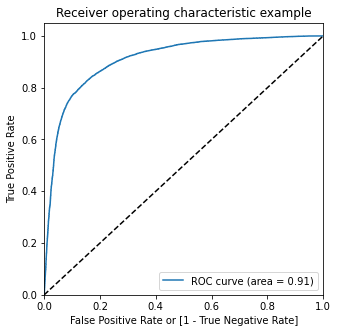

In [134]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Finding Optimal Cutoff Point

In [135]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.821193,0,1,1,1,1,1,1,1,1,1,1,0
1,0,0.044151,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.624529,2,1,1,1,1,1,1,1,1,0,0,0
3,0,0.273487,3,0,1,1,1,0,0,0,0,0,0,0
4,0,0.898833,4,1,1,1,1,1,1,1,1,1,1,0


In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]


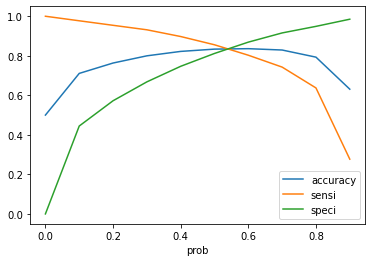

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Initially we selected the optimum point of classification as 0.5.

- From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.

In [138]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.821193,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
1,0,0.044151,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.624529,2,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
3,0,0.273487,3,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.898833,4,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [139]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.50  0.50  0.833684  0.855603  0.811764
0.51  0.51  0.834183  0.851030  0.817336
0.52  0.52  0.835103  0.846562  0.823644
0.53  0.53  0.836102  0.841831  0.830372
0.54  0.54  0.836207  0.836995  0.835418
0.55  0.55  0.836522  0.832054  0.840990
0.56  0.56  0.836522  0.826377  0.846667
0.57  0.57  0.835918  0.819807  0.852029
0.58  0.58  0.836259  0.814340  0.858179
0.59  0.59  0.836417  0.808820  0.864014


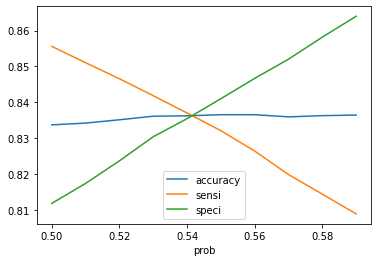

In [140]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at `0.54`**

In [141]:
# From the curve above, 5.4 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.54 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_predicted
0,0,0.821193,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
1,0,0.044151,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.624529,2,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1
3,0,0.273487,3,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.898833,4,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1


In [142]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8362068965517241

In [143]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[15893,  3131],
       [ 3101, 15923]], dtype=int64)

In [144]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8369953742640874
Specificity =  0.8354184188393609
False Positive Rate =  0.1645815811606392
Precision =  0.8356775480214128
True Negative Prediction Rate =  0.8367379172370222


### Precision and Recall

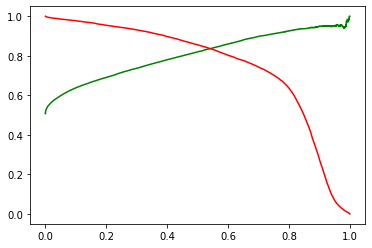

In [145]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

**As test data has already been Transformed, so now, go for feature selection for test data**

In [146]:
# Feature selection
X_test=X_test[col]
X_test.head()

,arpu_7,onnet_mou_8,offnet_mou_8,std_og_mou_8,loc_ic_mou_6,loc_ic_mou_8,std_ic_mou_8,total_ic_mou_7,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,monthly_2g_8,sachet_2g_7,sachet_3g_7,fb_user_8,aon,aug_vbc_3g,sep_vbc_3g,total_data_arpu_7,total_rech_amt_data_8
16568,0.034370,1.067472,-0.249036,0.829010,-0.246516,-0.281265,0.240872,-0.382113,-0.204616,-0.702863,-0.212784,-0.380318,-0.452970,-0.215014,-0.963258,-0.991805,-0.413169,-0.157104,-0.414508,-0.298404
21160,-0.114447,0.729879,-0.571172,-0.521910,-0.591258,-0.612260,-0.315786,-0.698387,0.347839,-0.467448,-0.557121,-0.380318,-0.452970,-0.215014,-0.963258,1.078409,-0.413169,-0.157104,-0.414508,-0.314788
23068,0.074531,-0.525988,-0.740452,-0.527433,-0.745937,-0.729910,-0.315786,-0.816835,-1.088544,-0.702863,-0.557121,-0.380318,-0.452970,-0.215014,-0.963258,-1.028418,-0.413169,-0.157104,3.235510,-0.314788
23231,1.035609,0.761419,1.913781,1.261764,-0.130638,-0.216786,0.724507,-0.096549,-0.315107,-0.702863,-0.557121,-0.380318,-0.085369,-0.215014,-0.963258,1.989554,-0.413169,-0.157104,-0.414508,-0.314788
25552,1.073879,-0.039994,0.169845,-0.465557,2.256012,0.652894,-0.315713,0.291812,0.347839,-0.310504,-0.557121,-0.380318,-0.452970,-0.215014,-0.963258,-0.877781,-0.413169,-0.157104,-0.414508,-0.314788


In [147]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

Predicting the target variable

In [148]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 16568    0.525585
21160    0.419249
23068    0.941850
23231    0.166917
25552    0.359885
21394    0.273439
20404    0.000005
5062     0.227688
18957    0.394576
21629    0.030927
dtype: float64


In [149]:
# convert all to a dataframe
y_pred_final = pd.DataFrame({'CustID':y_test.index, 'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_pred_final.head()

,CustID,Churn,Churn_Prob
16568,16568,0,0.525585
21160,21160,0,0.419249
23068,23068,1,0.941850
23231,23231,0,0.166917
25552,25552,0,0.359885


In [150]:
# reset index
y_pred_final.reset_index(drop=True, inplace=True)
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,16568,0,0.525585
1,21160,0,0.419249
2,23068,1,0.941850
3,23231,0,0.166917
4,25552,0,0.359885


In [151]:
# final predition of test data
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.54 else 0)
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,16568,0,0.525585,0
1,21160,0,0.419249,0
2,23068,1,0.941850,1
3,23231,0,0.166917,0
4,25552,0,0.359885,0


In [152]:
# Checking the overall accuracy of the predicted set.
print("Accuracy:",metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted))

# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted)
print("\nConfusion Matrix\n",confusion2_test)

Accuracy: 0.830588766072637

Confusion Matrix
 [[6802 1352]
 [ 150  562]]


In [153]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.7893258426966292
Specificity =  0.8341918077017415
False Positive Rate =  0.16580819229825852
Precision =  0.2936259143155695
True Negative Prediction Rate =  0.9784234752589183


### Explaining the results

In [154]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted),2)*100,"%")
print("The Sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  83.0 %
The Sensitivity of the predicted model is:  79.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



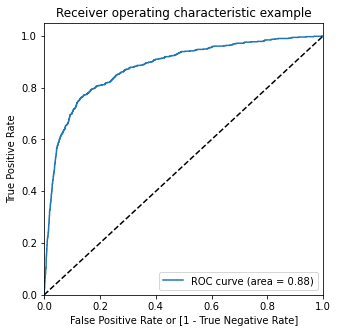

In [155]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Churn,y_pred_final.Churn_Prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.Churn,y_pred_final.Churn_Prob)

**The AUC score for train dataset is 0.91 and the test dataset is 0.88.<br> This model can be considered as a good model.**

In [156]:
res.params.sort_values(ascending=False)

arpu_7                   0.484267
loc_ic_mou_6             0.481173
total_ic_mou_7           0.373652
std_og_mou_8             0.264389
sachet_3g_7              0.178524
sachet_2g_7              0.135526
total_data_arpu_7        0.067526
total_rech_data_8       -0.288441
aug_vbc_3g              -0.343427
monthly_2g_8            -0.370602
last_day_rch_amt_8      -0.382723
aon                     -0.413634
onnet_mou_8             -0.461626
fb_user_8               -0.518411
std_ic_mou_8            -0.527925
offnet_mou_8            -0.552213
total_rech_num_8        -0.663786
total_rech_amt_data_8   -0.867722
const                   -2.307067
sep_vbc_3g              -2.542521
loc_ic_mou_8            -2.589116
dtype: float64

## Logistic Regression using PCA

In [157]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset with MinMaxScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_col = X_train.columns
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train.shape)
print("Dimension of y_train_sm Shape:", y_train.shape)

X_train = pd.DataFrame(data=X_train, columns=num_col)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.head()

Dimension of X_train: (20686, 96)
Dimension of X_test: (8866, 96)
Dimension of X_train_sm Shape: (38048, 96)
Dimension of y_train_sm Shape: (38048,)
X_train.shape: (38048, 96)
y_train.shape: (38048,)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_vol_mb_6,total_vol_mb_7,total_vol_mb_8,total_data_arpu_6,total_data_arpu_7,total_data_arpu_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_june6,total_rech_amt_july7,total_rech_amt_aug8,av_amt_data_6_7
0,0.381205,0.447641,0.197174,0.005211,0.000323,0.000723,0.006300,0.000291,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.009240,0.000547,0.000677,0.000000,0.000000,0.000000,0.011320,0.000504,0.000664,0.019161,0.034218,0.028908,0.000000,0.000000,0.000000,0.018512,0.026016,0.025678,0.056,0.033613,0.034483,0.0444,0.078595,0.074863,0.045373,0.081290,0.045403,0.008955,0.013643,0.045403,0.032787,0.018519,0.050000,0.097749,0.162058,0.129904,0.092881,0.081029,0.187460,0.001513,0.001911,0.000900,0.043951,0.047863,0.024203,0.0,0.0,0.0,0.00,0.00,0.0,0.02381,0.000000,0.022727,0.000000,0.125,0.111111,0.034483,0.000000,0.02439,1.0,1.0,1.0,0.638735,0.052917,0.029745,0.061725,0.0,0.044696,0.048415,0.024540,0.030596,0.084399,0.093109,0.016273,0.004575,0.020768,0.021763,0.009523,0.024883,0.007106
1,0.364433,0.402662,0.158362,0.020584,0.002820,0.019545,0.022741,0.012232,0.023452,0.0,0.000000,0.062929,0.0,0.000000,0.071678,0.040500,0.010382,0.013415,0.000655,0.001026,0.001146,0.040948,0.010541,0.014157,0.022252,0.011271,0.018605,0.001238,0.000519,0.001545,0.023008,0.018842,0.019538,0.056,0.042017,0.043103,0.0400,0.027871,0.045537,0.029851,0.032258,0.033715,0.029851,0.000000,0.033715,0.016393,0.037037,0.033333,0.093248,0.097749,0.097749,0.044302,0.097749,0.097749,0.014159,0.004761,0.004708,0.015495,0.026562,0.010597,0.0,0.0,0.0,0.00,0.00,0.0,0.00000,0.020833,0.022727,0.071429,0.000,0.000000,0.000000,0.028571,0.02439,1.0,1.0,1.0,0.584158,0.045628,0.068585,0.018022,0.0,0.022803,0.027974,0.012362,0.047128,0.028850,0.026990,0.003881,0.011038,0.007219,0.009046,0.012626,0.009884,0.001689
2,0.360479,0.439657,0.143432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002306,0.006372,0.005894,0.000179,0.000000,0.000000,0.002392,0.004845,0.005235,0.008,0.025210,0.008621,0.0504,0.070234,0.045902,0.075224,0.081290,0.056642,0.075224,0.114598,0.056642,0.016393,0.018519,0.016667,0.162058,0.162058,0.162058,0.076994,0.081029,0.081029,0.117671,0.168638,0.086447,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.00000,0.000000,0.000000,0.071429,0.125,0.111111,0.000000,0.000000,0.00000,1.0,1.0,1.0,0.014972,0.000000,0.000000,0.000000,0.0,0.060841,0.050370,0.032411,0.079289,0.084399,0.083993,0.006745,0.004575,0.002992,0.013215,0.008988,0.005806,0.000906
3,0.486633,0.502435,0.061668,0.016967,0.004900,0.000000,0.165100,0.106396,0.000963,0.0,0.005601,0.001477,0.0,0.003369,0.001126,0.021045,0.005524,0.000161,0.156933,0.067099,0.000519,0.178839,0.073189,0.000615,0.015284,0.008

In [158]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train)

PCA(random_state=42)

In [159]:
X_train_pca=pca.fit_transform(X_train)
print("Dimension of X_train_sm_pca: ",X_train_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38048, 96)
Dimension of X_test_pca:  (8866, 96)


In [160]:
#Viewing the PCA components
pca.components_

array([[-4.84266506e-02, -2.61220391e-02,  1.24386781e-03, ...,
         8.94743540e-03,  5.52359838e-03,  1.47063080e-02],
       [ 2.63650025e-02,  1.11101623e-01,  2.02281489e-01, ...,
         1.39024357e-02,  1.30924296e-02,  7.72842028e-03],
       [ 1.00141412e-01, -1.31972400e-02,  9.25225794e-02, ...,
        -7.77059026e-03,  7.22750112e-03,  5.10349171e-03],
       ...,
       [ 0.00000000e+00,  3.29584271e-17, -5.41863962e-18, ...,
         2.20243390e-01, -4.27451656e-02, -1.64034312e-01],
       [ 0.00000000e+00,  3.74529279e-17,  9.84176899e-18, ...,
        -3.71069681e-01,  5.13608093e-01, -4.91113807e-02],
       [ 0.00000000e+00, -1.37243823e-17,  4.23047342e-17, ...,
        -5.14821032e-01, -3.96048668e-01, -1.50918447e-03]])

### Performing Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train)

# making the predictions
y_test_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
print("Dimension of y_pred_df:", y_test_pred_df.shape)

Dimension of y_pred_df: (8866, 1)


In [162]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_test_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_test_pred))

Confusion Matirx for y_test & y_pred
 [[6689 1465]
 [ 133  579]] 

Accuracy of the logistic regression model with PCA:  0.8197608842770133


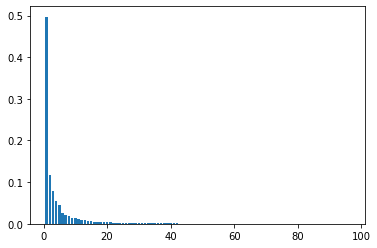

In [163]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

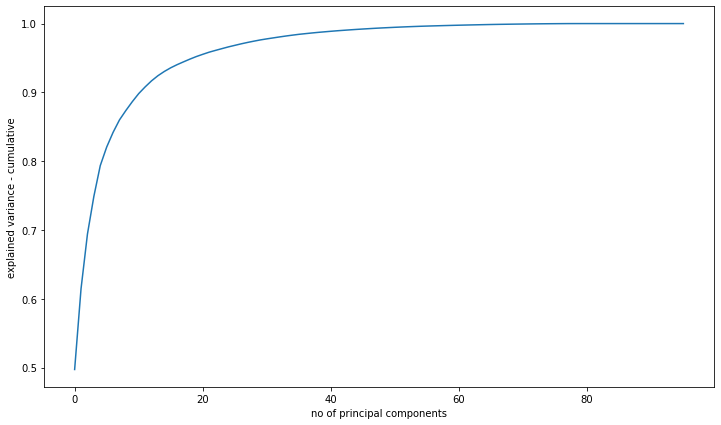

In [164]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [165]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([49.7, 61.4, 69.3, 74.8, 79.3, 82. , 84.1, 85.9, 87.3, 88.6, 89.8,
       90.8, 91.7, 92.4, 93. , 93.5, 94. , 94.4, 94.8, 95.2, 95.5, 95.8,
       96.1, 96.4, 96.7, 96.9, 97.1, 97.3, 97.5, 97.7, 97.9, 98. , 98.1,
       98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2,
       99.3, 99.4, 99.5, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6])

 **99% of the data can be explained with 60 PCA components**

**Fitting the dataset with the 60 explainable components**

In [166]:
lg_pca_60 = PCA(n_components=60)

lg_train_pca_60 = lg_pca_60.fit_transform(X_train)
print("Dimension for Train dataset using PCA: ", lg_train_pca_60.shape)

lg_test_pca_60 = lg_pca_60.transform(X_test)
print("Dimension for Test dataset using PCA: ", lg_test_pca_60.shape)

Dimension for Train dataset using PCA:  (38048, 60)
Dimension for Test dataset using PCA:  (8866, 60)


In [167]:
logreg_pca_60 = LogisticRegression()
logreg_pca_60.fit(lg_train_pca_60, y_train)

# making the predictions
y_test_lg_pred_60 = logreg_pca_60.predict(lg_test_pca_60)

# converting the prediction into a dataframe
y_test_lg_pred_df_60 = pd.DataFrame(y_test_lg_pred_60)
print("Dimension of y_test_pred_df_60: ", y_test_lg_pred_df_60.shape)

Dimension of y_test_pred_df_60:  (8866, 1)


In [168]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_test_lg_pred_60),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_test_lg_pred_60))

# Checking the Precision, Recall, F1_score and AUC
print("Precision of the logistic regression model with PCA: ", precision_score(y_test,y_test_lg_pred_60))
print("Recall of the logistic regression model with PCA: ", recall_score(y_test,y_test_lg_pred_60))
print("F1 Score of the logistic regression model with PCA: ", f1_score(y_test,y_test_lg_pred_60))
print("AUC of the logistic regression model with PCA: ", roc_auc_score(y_test, logreg_pca_60.predict_proba(lg_test_pca_60)[:, 1]))

Confusion Matirx for y_test & y_pred
 [[6686 1468]
 [ 133  579]] 

Accuracy of the logistic regression model with PCA:  0.8194225129709001
Precision of the logistic regression model with PCA:  0.2828529555446996
Recall of the logistic regression model with PCA:  0.8132022471910112
F1 Score of the logistic regression model with PCA:  0.41971728887278004
AUC of the logistic regression model with PCA:  0.8822734344211017


In [169]:
# metrics data
accuracy = accuracy_score(y_test,y_test_lg_pred_60)
precision = precision_score(y_test,y_test_lg_pred_60)
recall = recall_score(y_test,y_test_lg_pred_60)
f1 = f1_score(y_test,y_test_lg_pred_60)
auc = roc_auc_score(y_test, logreg_pca_60.predict_proba(lg_test_pca_60)[:, 1])

metrics_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'AUC', 'F1']
metrics_data = [['Logistic Regressin(PCA)', accuracy, precision, recall, auc, f1]]

metrics_df = pd.DataFrame(data=metrics_data, columns=metrics_cols)
metrics_df


,Model,Accuracy,Precision,Recall,AUC,F1
0,Logistic Regressin(PCA),0.819423,0.282853,0.813202,0.882273,0.419717


**Logistic Regression with PCA gives us an Accuracy of 81.9%**

## XGBoost Model

In [170]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

 **Also from the above PCA results we have seen that about 99% of the data can be explained with 60 PCA components**

**Fitting the dataset with the 60 explainable components**

In [171]:
pca_60 = PCA(n_components=60)

train_pca_60 = pca_60.fit_transform(X_train)
print("Dimension for Train dataset using PCA: ", train_pca_60.shape)

test_pca_60 = pca_60.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_60.shape)

Dimension for Train dataset using PCA:  (38048, 60)
Dimension for Test dataset using PCA:  (8866, 60)


In [172]:
# fit model on training data with default hyperparameters
clf_xgb = XGBClassifier(random_state=42)
clf_xgb.fit(train_pca_60, y_train)

[21:53:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [173]:
# evaluate predictions
y_test_pred = clf_xgb.predict(test_pca_60)

In [174]:

def print_model_metrics(y_test,y_pred,model_name):
    cp = confusion_matrix(y_test,y_pred)
    print(cp)
    
    accuracy = round(accuracy_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    precision = round(precision_score(y_test,y_pred),2)
#     auc = round(roc_auc_score(y_test,y_pred),2)
    f1 = round(f1_score(y_test,y_pred),2)
    
    data = [[model_name,accuracy,recall,precision,f1]] 
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','F1'])
    return df

In [175]:
print_model_metrics(y_test, y_test_pred, 'XGBoost(Default)')

[[7557  597]
 [ 283  429]]


,Model,Accuracy,Precision,Recall,F1
0,XGBoost(Default),0.9,0.6,0.42,0.49


In [176]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=clf_xgb.predict_proba(test_pca_60)[:, 1]))

AUC on test data by XGBoost = 0.861542070755926


In [177]:
# metrics data
accuracy = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
auc = roc_auc_score(y_test, clf_xgb.predict_proba(test_pca_60)[:, 1])

metrics_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'AUC', 'F1']
metrics_data = [['XGBoost(Default)', accuracy, precision, recall, auc, f1]]

xgb_df1= pd.DataFrame(data=metrics_data, columns=metrics_cols)
metrics_df = metrics_df.append(xgb_df1,ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,AUC,F1
0,Logistic Regressin(PCA),0.819423,0.282853,0.813202,0.882273,0.419717
1,XGBoost(Default),0.900744,0.418129,0.602528,0.861542,0.493671


### Hyperparameter Tuning in XGBoost

Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

In [178]:
# libraries
from sklearn.model_selection import GridSearchCV

In [179]:
# function for getting optimum hyperparameter tuning 
def tune_hyperparameter(parameters,X_train,y_train,n_folds = 5):
    
    xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1)
    
    xgb_model_cv = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=5,
                                       scoring='accuracy',
                                       verbose=1,
                                       refit=True)

#     rf = GridSearchCV(rf, parameters, cv=n_folds,n_jobs = -1, scoring="accuracy",return_train_score=True)
#     rf.fit(x_train, y_train)
    xgb_model_cv.fit(X_train, y_train)
    scores = xgb_model_cv.cv_results_

    for key in parameters.keys():
        hyperparameters = key
        break

    # plotting accuracies for parameters
    plt.figure(figsize=(16,5))
    # plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[22:05:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


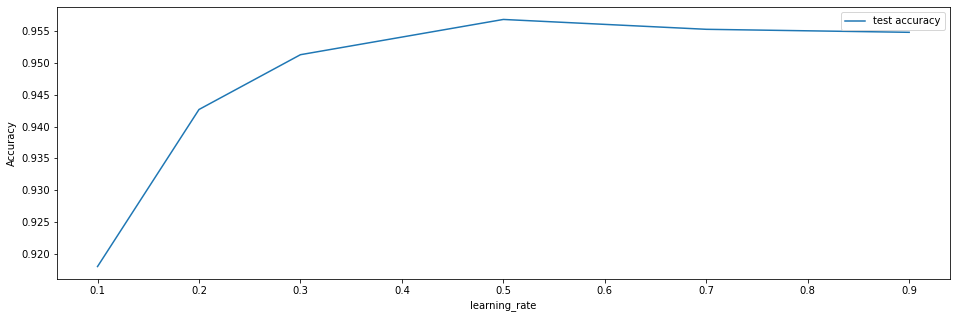

In [180]:
# fit the model with learning_rate parameters
parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]}
tune_hyperparameter(parameters,train_pca_60,y_train)

From the above fig, we can see that from 0.5 to 0.7 there is a pretty good hike in accuracy. So let us take 0.6 for our final model

In [181]:
learning_rate = 0.6

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[22:12:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


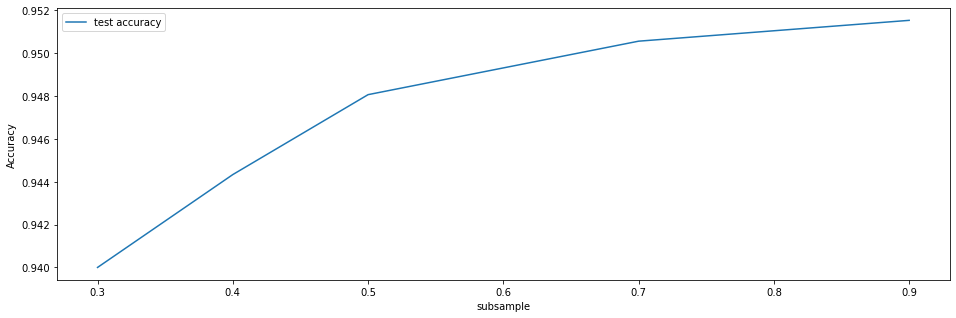

In [182]:
# fit the model with subsample parameters
parameters = {'subsample': [0.3, 0.4, 0.5, 0.7, 0.9]}
tune_hyperparameter(parameters,train_pca_60,y_train)

From the above fig, we can see that from 0.4 to 0.5 there is a pretty good hike in accuracy. So let us take 0.5 for our final model

In [183]:
subsample = 0.5

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[22:23:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


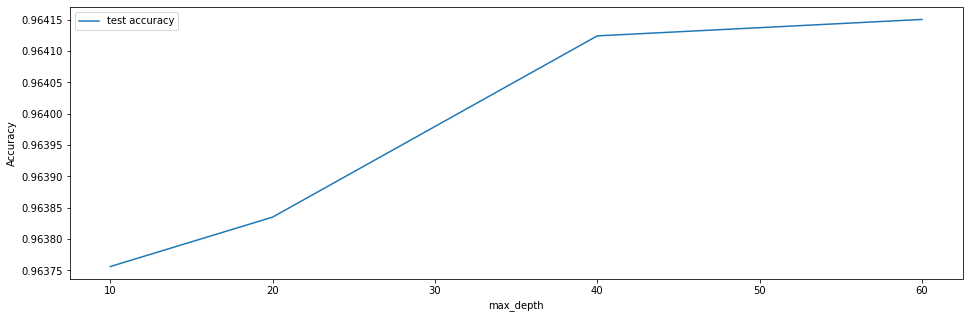

In [184]:
# fit the model with max_depth parameters
parameters = {'max_depth': [10, 20, 40, 60]}
tune_hyperparameter(parameters,train_pca_60,y_train)

From the above fig, we can see that from 20 to 40 there is a pretty good trend in accuracy. So let us take 30 for our final model

In [185]:
max_depth = 30

### Optimum Hyperparameter Tuned model

In [186]:
xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1)

# optimum for best hyperparameters
parameters = {'learning_rate': [learning_rate],
              'subsample': [subsample],
              'max_depth': [max_depth]}

xgb_model_cv = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=5,
                                       scoring='accuracy',
                                       verbose=1,
                                       refit=True)

xgb_model_cv.fit(train_pca_60, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[22:25:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, val

In [187]:
print(xgb_model_cv.best_params_)
print(xgb_model_cv.best_score_)
print(xgb_model_cv.best_estimator_)

{'learning_rate': 0.6, 'max_depth': 30, 'subsample': 0.5}
0.9565549027372487
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [188]:
final_xgb_model = xgb_model_cv.best_estimator_
y_test_pred_60 = final_xgb_model.predict(test_pca_60)

In [189]:
# optimum hyperparametered XGBoost
print_model_metrics(y_test, y_test_pred_60, 'XGBoost(Tuned)')

[[7696  458]
 [ 353  359]]


,Model,Accuracy,Precision,Recall,F1
0,XGBoost(Tuned),0.91,0.5,0.44,0.47


In [190]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=final_xgb_model.predict_proba(train_pca_60)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_xgb_model.predict_proba(test_pca_60)[:, 1]))

AUC on train data by XGBoost = 0.9999999999999999
AUC on test data by XGBoost = 0.8580006917401813


In [191]:
# Checking the Confusion matrix
print("Confusion Matirx of XGBoost model with PCA:\n",confusion_matrix(y_test,y_test_pred_60),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the XGBoost model with PCA: ",accuracy_score(y_test,y_test_pred_60))

Confusion Matirx of XGBoost model with PCA:
 [[7696  458]
 [ 353  359]] 

Accuracy of the XGBoost model with PCA:  0.9085269569140537


In [192]:
# metrics data
accuracy = accuracy_score(y_test,y_test_pred_60)
precision = precision_score(y_test,y_test_pred_60)
recall = recall_score(y_test,y_test_pred_60)
f1 = f1_score(y_test,y_test_pred_60)
auc = roc_auc_score(y_test, final_xgb_model.predict_proba(test_pca_60)[:, 1])

metrics_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'AUC', 'F1']
metrics_data = [['XGBoost(Tuned)', accuracy, precision, recall, auc, f1]]

xgb_df2= pd.DataFrame(data=metrics_data, columns=metrics_cols)
metrics_df = metrics_df.append(xgb_df2,ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,AUC,F1
0,Logistic Regressin(PCA),0.819423,0.282853,0.813202,0.882273,0.419717
1,XGBoost(Default),0.900744,0.418129,0.602528,0.861542,0.493671
2,XGBoost(Tuned),0.908527,0.439412,0.504213,0.858001,0.469588


**From the above results we can see that for XGBoost with Hyperparameter tuned. We got Accuracy of 90.8%. This could be considered as best model.**

## Extract the intercept and the coefficients from the logistic model

In [193]:
res.params.sort_values(ascending=False)

arpu_7                   0.484267
loc_ic_mou_6             0.481173
total_ic_mou_7           0.373652
std_og_mou_8             0.264389
sachet_3g_7              0.178524
sachet_2g_7              0.135526
total_data_arpu_7        0.067526
total_rech_data_8       -0.288441
aug_vbc_3g              -0.343427
monthly_2g_8            -0.370602
last_day_rch_amt_8      -0.382723
aon                     -0.413634
onnet_mou_8             -0.461626
fb_user_8               -0.518411
std_ic_mou_8            -0.527925
offnet_mou_8            -0.552213
total_rech_num_8        -0.663786
total_rech_amt_data_8   -0.867722
const                   -2.307067
sep_vbc_3g              -2.542521
loc_ic_mou_8            -2.589116
dtype: float64

In [194]:
coef_column = res.params.sort_values(ascending=False).index
coef_data = res.params.sort_values(ascending=False).values

In [195]:
coef_df = pd.DataFrame(data=coef_data, index=coef_column)
coef_df.index.names=['Features']
coef_df.rename(columns={0:'Coefficients'}, inplace=True)
coef_df.T

Features,arpu_7,loc_ic_mou_6,total_ic_mou_7,std_og_mou_8,sachet_3g_7,sachet_2g_7,total_data_arpu_7,total_rech_data_8,aug_vbc_3g,monthly_2g_8,last_day_rch_amt_8,aon,onnet_mou_8,fb_user_8,std_ic_mou_8,offnet_mou_8,total_rech_num_8,total_rech_amt_data_8,const,sep_vbc_3g,loc_ic_mou_8
Coefficients,0.484267,0.481173,0.373652,0.264389,0.178524,0.135526,0.067526,-0.288441,-0.343427,-0.370602,-0.382723,-0.413634,-0.461626,-0.518411,-0.527925,-0.552213,-0.663786,-0.867722,-2.307067,-2.542521,-2.589116


## Business Insights

- There are less number of **high value customer** that are churing.

**Top 5 features that determine the Churn Prediction are:**
- arpu_7
- loc_ic_mou_6
- total_ic_mou_7
- std_og_mou_8
- sachet_3g_7

Features belong to August Month seems to be more important features.
<br>
i.e., Columns like **STD calls, Local calls** and **Recharge amounts** in the month of **August**. 

- By this we can say that, Customer who are **less** active in the **month of August** are more likely to churn. 

**These customers can be retained by providing Recharge Offer/Cashbacks, as they are mostly related to recharge columns**